In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from datetime import datetime
from pathlib import Path
from matplotlib.patches import Rectangle

from utils import *

BASE_DIR = Path(os.path.abspath(''))
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


# Compare masking methods

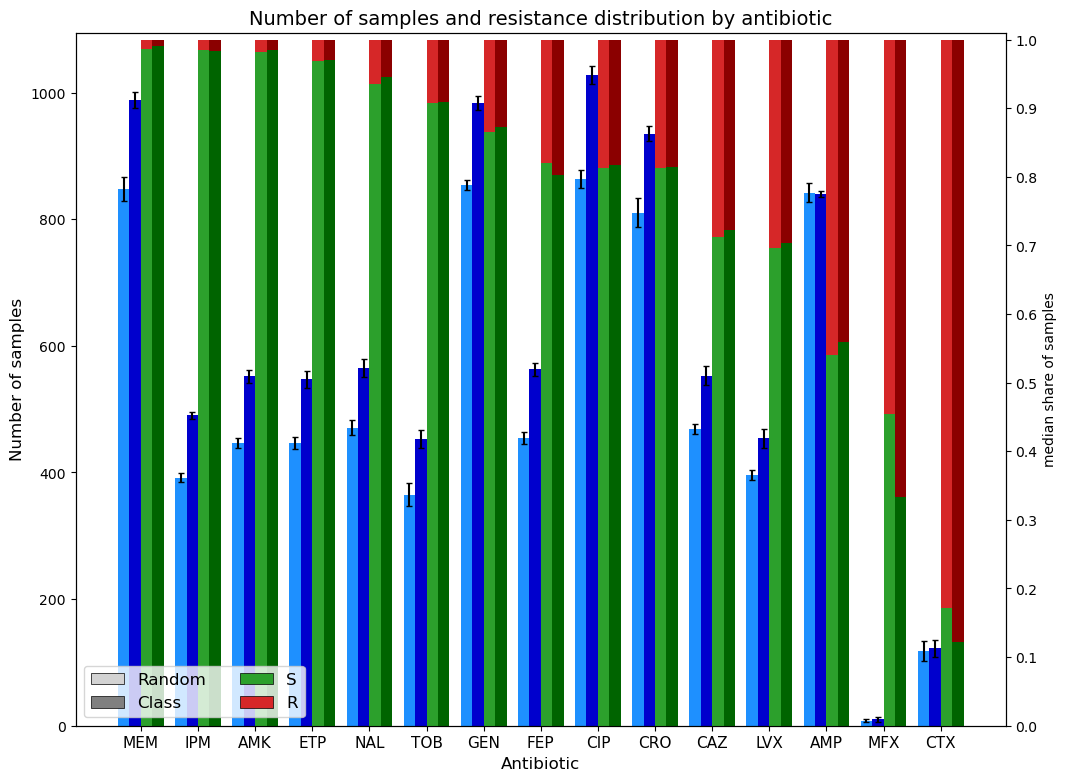

In [3]:
results_random = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', '15_ab', 'FT_noPT_0.75_0.7', 'CV_results.pkl'))
results_class = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', '15_ab', 'FT_noPT_0.75_class', 'CV_results.pkl'))
df_ab_random = get_ab_stats_df(results_random, with_ab_as_index=True)
df_ab_class = get_ab_stats_df(results_class, with_ab_as_index=True)

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.2
# df_ab_random = df_ab_random.sort_values(by='avg_num', ascending=False)
df_ab_random = df_ab_random.sort_values(by='S_share_median', ascending=False)
df_ab_class = df_ab_class.reindex_like(df_ab_random)
ind = np.arange(len(df_ab_random.index))
bar_num = ax.bar(
    ind-3/2*bar_width, df_ab_random['avg_num'], width=bar_width, color='dodgerblue',
    yerr=df_ab_random['std_num'], capsize=2, ecolor='k'
)
bar_num_class = ax.bar(
    ind-bar_width/2, df_ab_class['avg_num'], width=bar_width, color='mediumblue',
    yerr=df_ab_class['std_num'], capsize=2, ecolor='k'
)
ax2 = ax.twinx()
bar_R_share = ax2.bar(
    ind+bar_width/2, df_ab_random['R_share_median'], bottom=df_ab_random['S_share_median'], width=bar_width, color='tab:red'
)
bar_S_share = ax2.bar(
    ind+bar_width/2, df_ab_random['S_share_median'], width=bar_width, color='tab:green'
)
bar_R_share_class = ax2.bar(
    ind+3/2*bar_width, df_ab_class['R_share_median'], bottom=df_ab_class['S_share_median'], width=bar_width, color='darkred'
)
bar_S_share_class = ax2.bar(
    ind+3/2*bar_width, df_ab_class['S_share_median'], width=bar_width, color='darkgreen'
)
ax.set_xticks(ind, df_ab_random.index, fontsize=11)
ax.set_title('Number of samples and resistance distribution by antibiotic', fontsize=14)
ax.set_xlabel('Antibiotic', fontsize=12)
ax.set_ylabel('Number of samples', fontsize=12)
ax2.set_ylabel('median share of samples')
ax2.set_ylim(0, 1.01)
ax2.set_yticks(np.arange(0, 1.01, 0.1))

# custom legend
from matplotlib.patches import Rectangle

num_rand = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
num_class = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
S_share = Rectangle((0,0),1,1,fc='tab:green', edgecolor='k', linewidth=0.5)
R_share = Rectangle((0,0),1,1,fc='tab:red', edgecolor='k', linewidth=0.5)

ax2.legend(
    handles=[num_rand, num_class, S_share, R_share], 
    labels=['Random', 'Class', 'S', 'R'],
    loc='lower left',
    fontsize=12, 
    ncols=2
)
savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'ab_samples_and_resistance.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

# Compare effect of pre-training

In [4]:
colors = ['slategray', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred']
drop_metrics = ['Loss', 'Accuracy']

### p = (0.75, 0.7)

In [5]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.7')

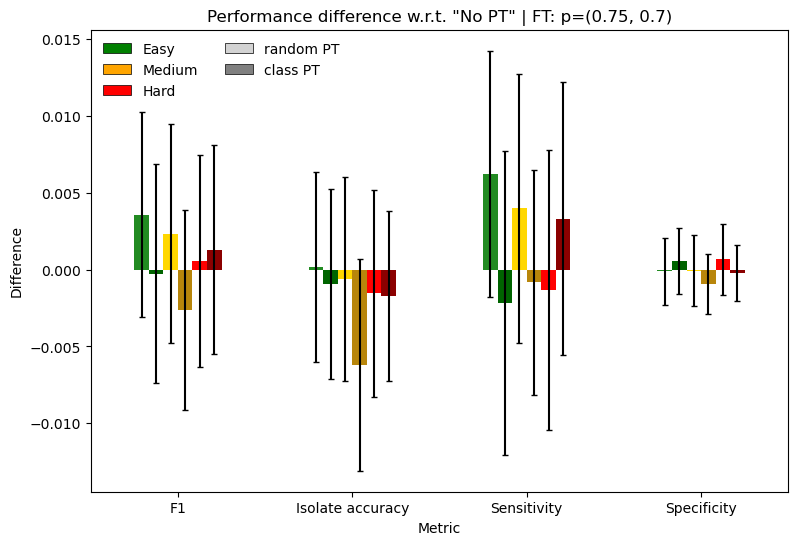

In [6]:
fig, ax = plt.subplots(figsize=(9, 6))
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, figsize=(9, 6), color=colors[1:], ax=ax, capsize=2, ecolor='k')
ax.set_title('Performance difference w.r.t. "No PT" | FT: p=(0.75, 0.7)')
ax.set_xlabel('Metric')
ax.set_ylabel('Difference')
easy = Rectangle((0,0),1,1,fc='green', edgecolor='k', linewidth=0.5)
medium = Rectangle((0,0),1,1,fc='orange', edgecolor='k', linewidth=0.5)
hard = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax.legend(
    handles=[easy, medium, hard, pt, cpt], 
    labels=['Easy', 'Medium', 'Hard', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,  
    # loc='lower right',
)
savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'rnd0.7FT_rel_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

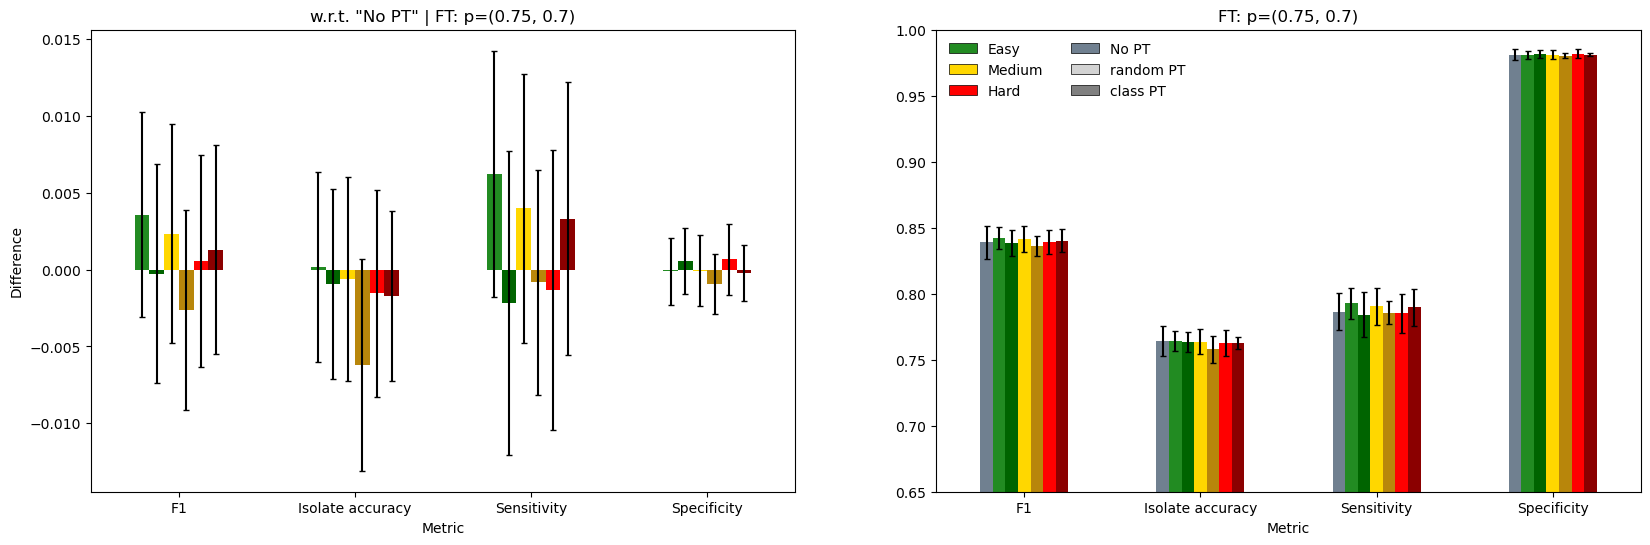

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.7)')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.7)')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'rand0.7FT_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

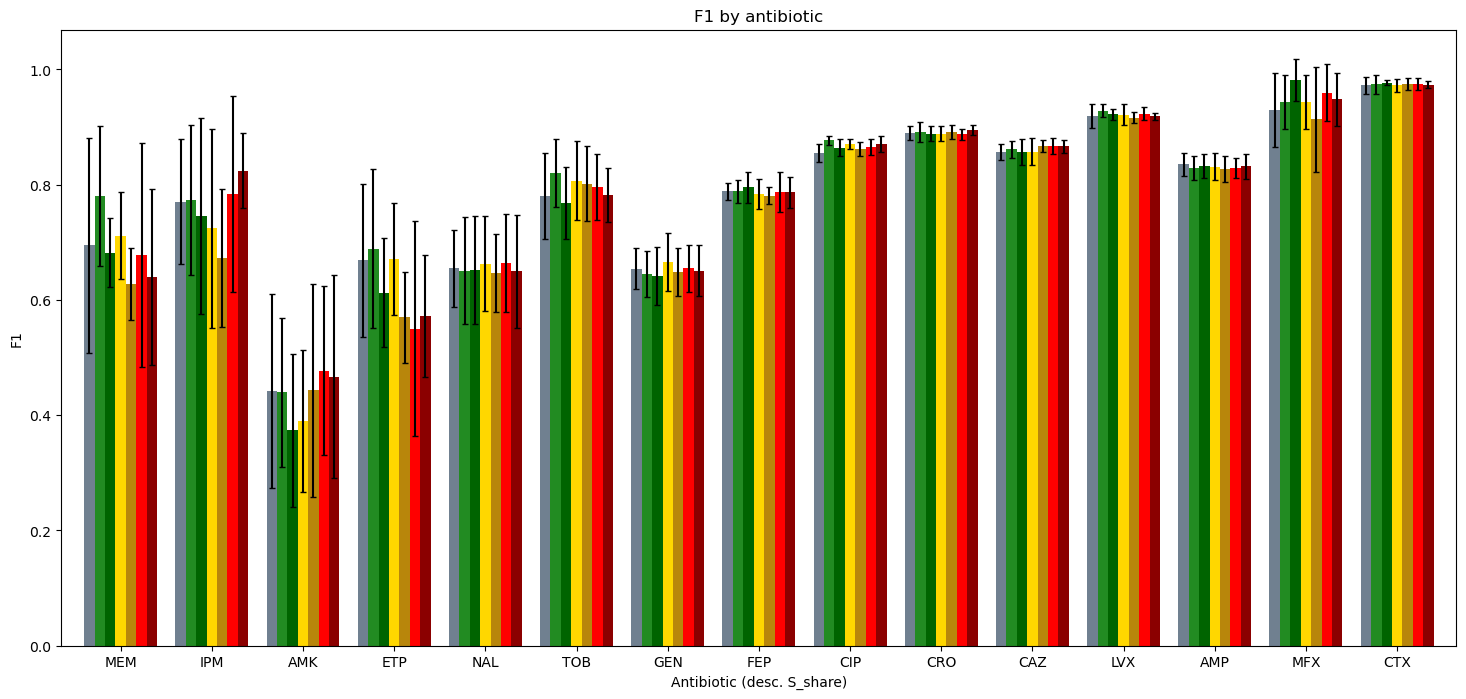

In [8]:
df_CV_ab = load_and_create_ab_df('0.75_0.7')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

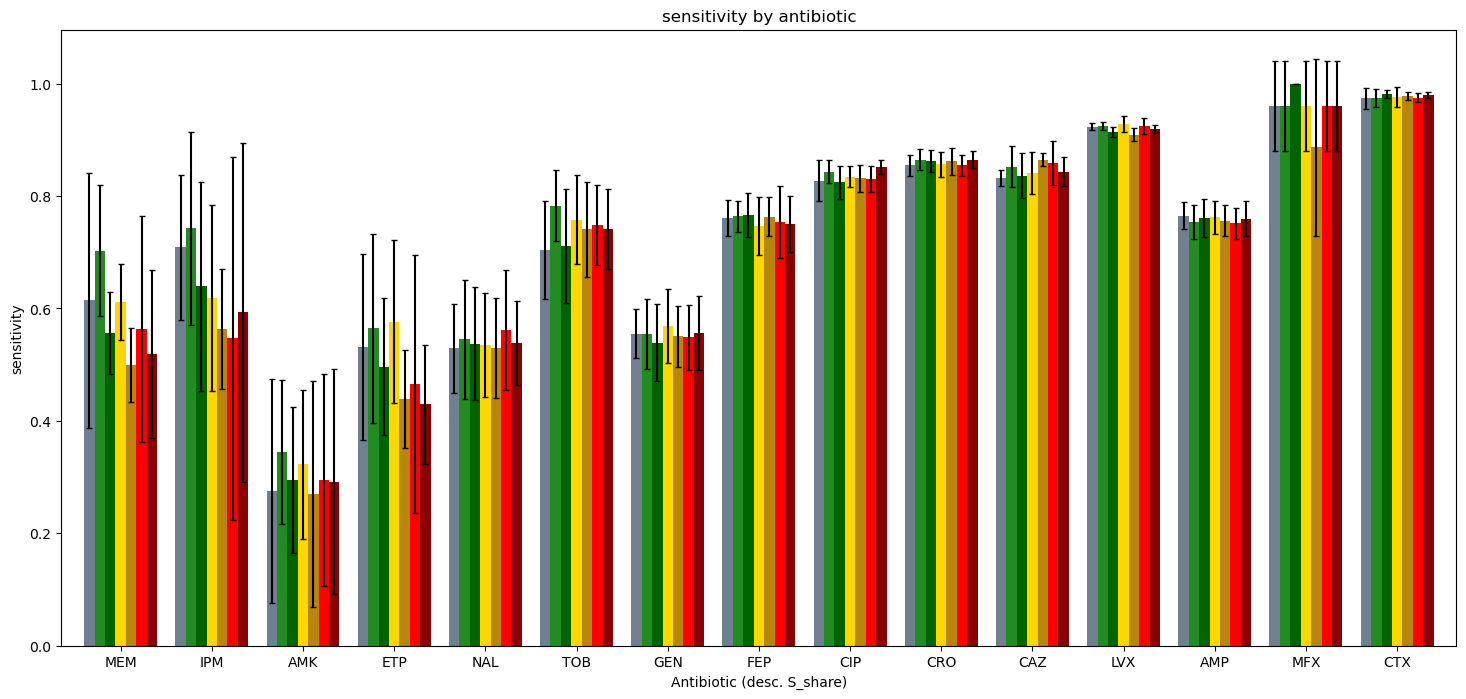

In [9]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### p = (0.75, 0.9)

In [10]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.9')

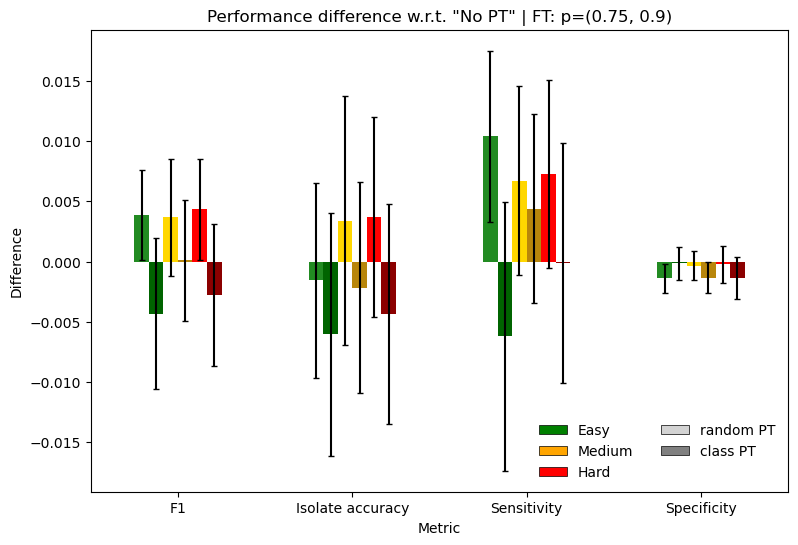

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, figsize=(9, 6), color=colors[1:], ax=ax, capsize=2, ecolor='k')
ax.set_title('Performance difference w.r.t. "No PT" | FT: p=(0.75, 0.9)')
ax.set_xlabel('Metric')
ax.set_ylabel('Difference')
easy = Rectangle((0,0),1,1,fc='green', edgecolor='k', linewidth=0.5)
medium = Rectangle((0,0),1,1,fc='orange', edgecolor='k', linewidth=0.5)
hard = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax.legend(
    handles=[easy, medium, hard, pt, cpt], 
    labels=['Easy', 'Medium', 'Hard', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,  
    # loc='lower right',
)
savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'rnd0.9FT_rel_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

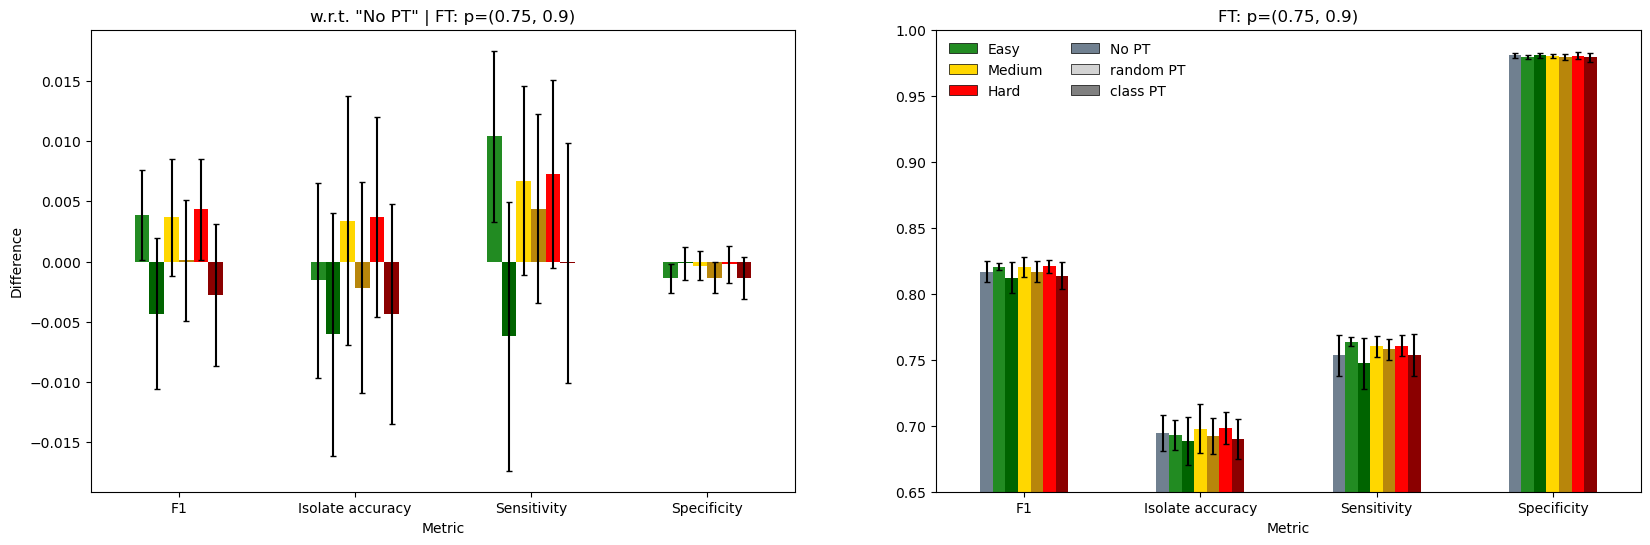

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.9)')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.9)')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'rand0.9FT_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

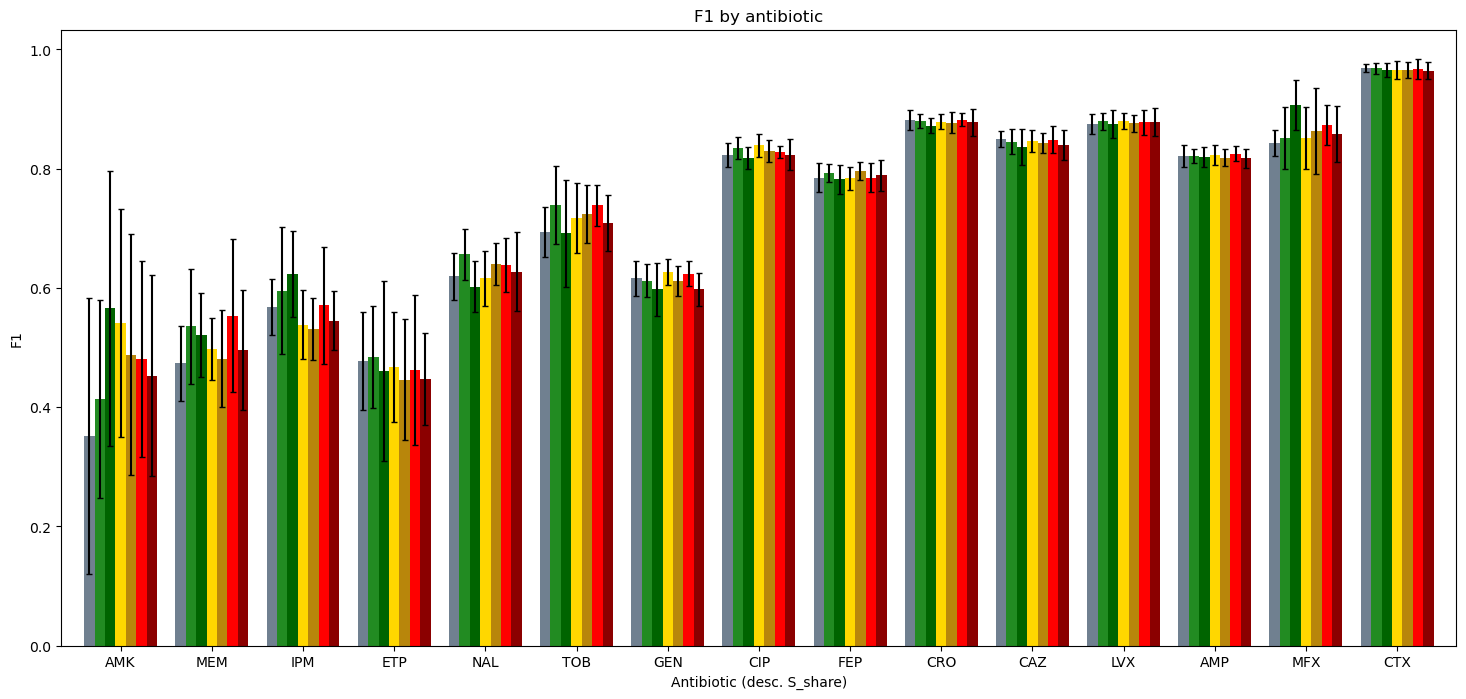

In [13]:
df_CV_ab = load_and_create_ab_df('0.75_0.9')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

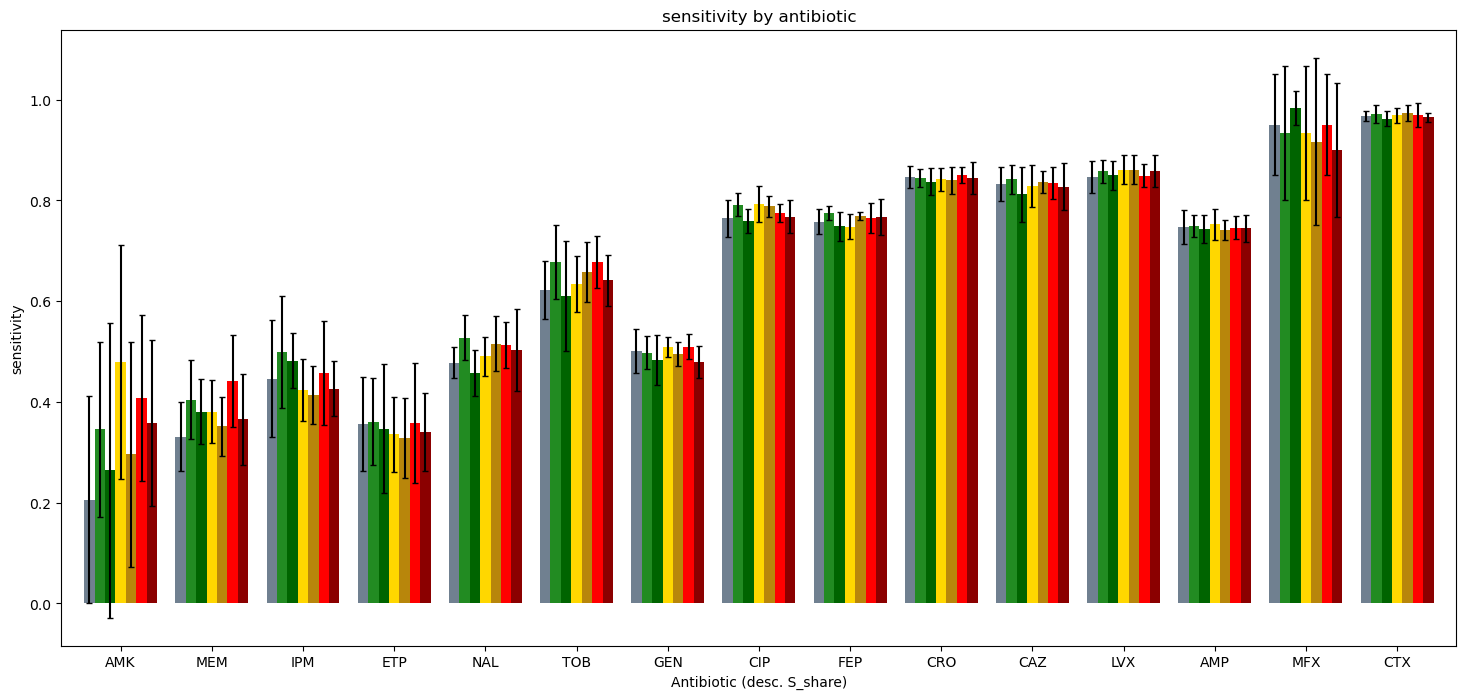

In [14]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### p = (0.75, 1 class)

In [15]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_class')

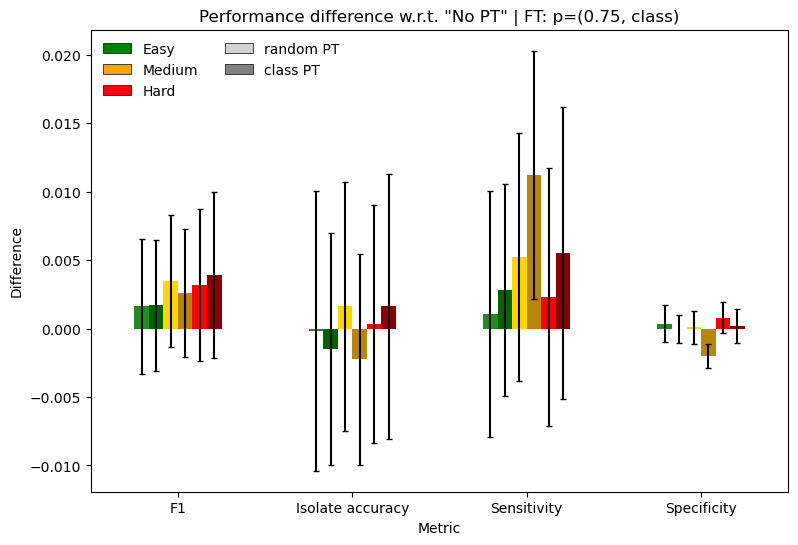

In [16]:
fig, ax = plt.subplots(figsize=(9, 6))
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, figsize=(9, 6), color=colors[1:], ax=ax, capsize=2, ecolor='k')
ax.set_title('Performance difference w.r.t. "No PT" | FT: p=(0.75, class)')
ax.set_xlabel('Metric')
ax.set_ylabel('Difference')
easy = Rectangle((0,0),1,1,fc='green', edgecolor='k', linewidth=0.5)
medium = Rectangle((0,0),1,1,fc='orange', edgecolor='k', linewidth=0.5)
hard = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax.legend(
    handles=[easy, medium, hard, pt, cpt], 
    labels=['Easy', 'Medium', 'Hard', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,  
    # loc='lower right',
)
savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'classFT_rel_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

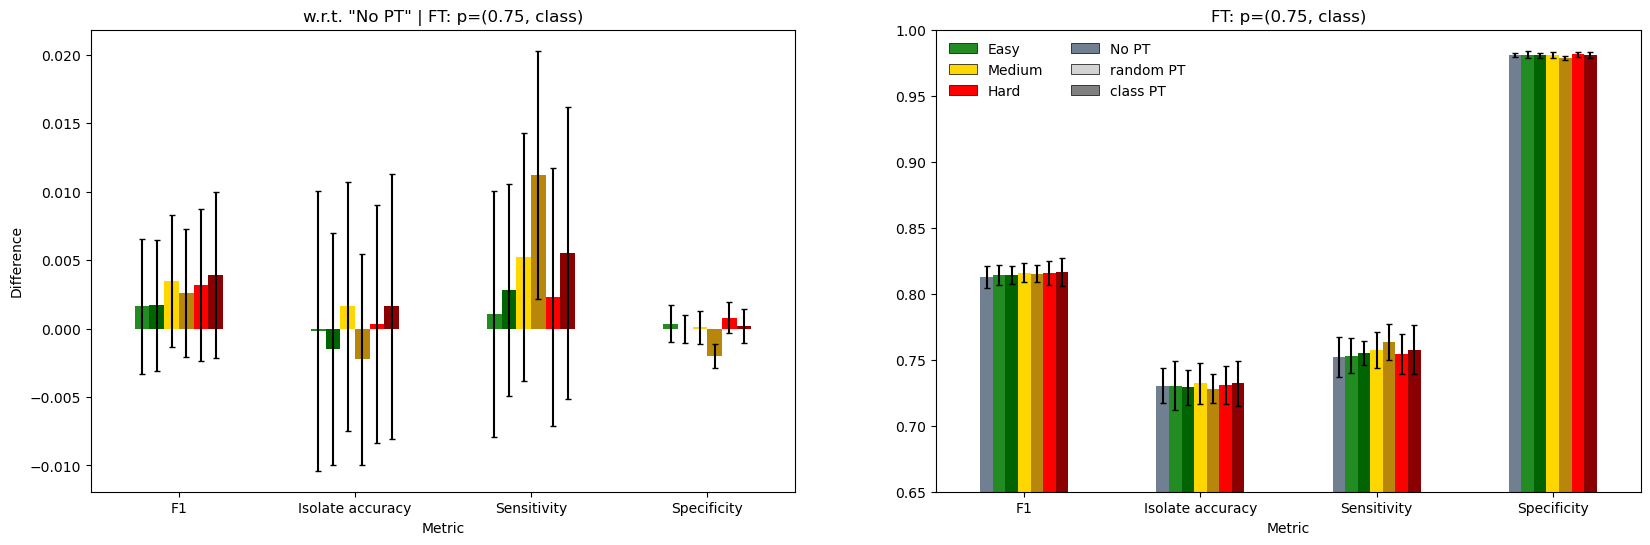

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, class)')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, class)')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'classFT_diff.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

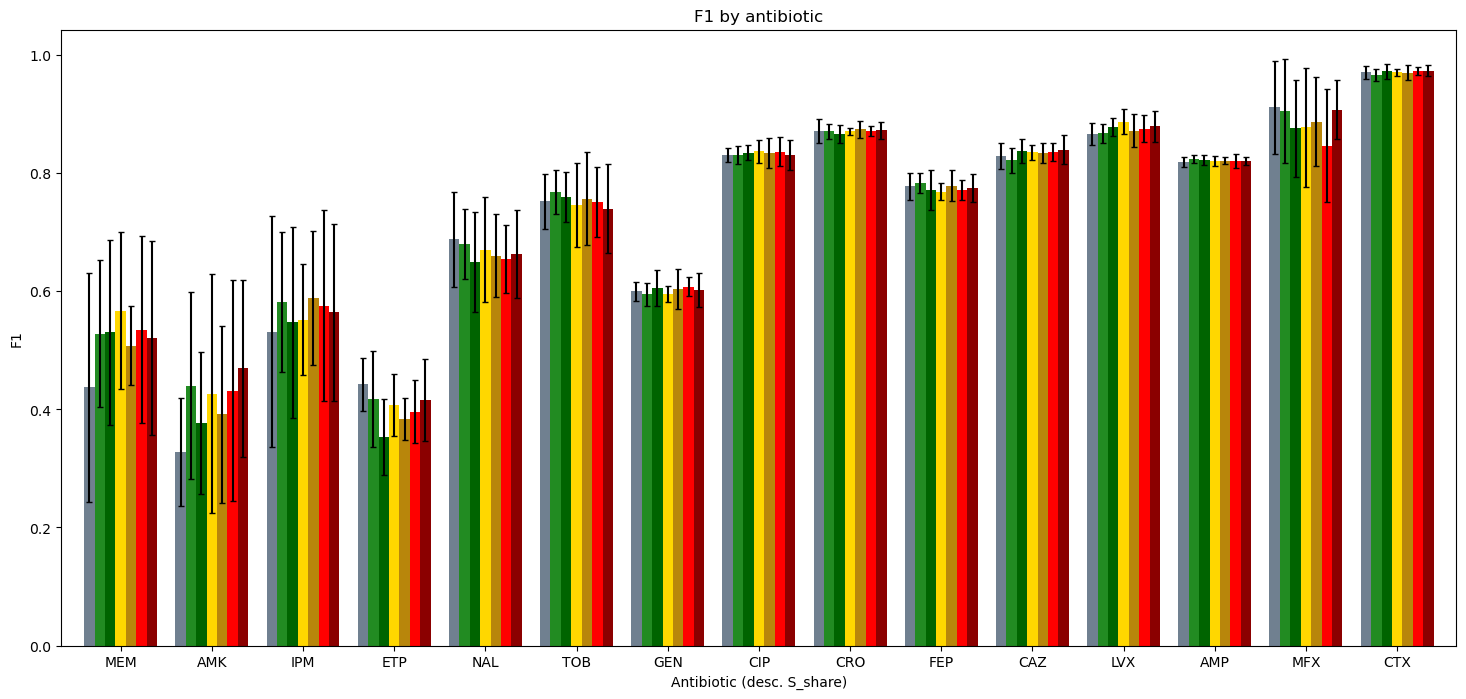

In [18]:
df_CV_ab = load_and_create_ab_df('0.75_class')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

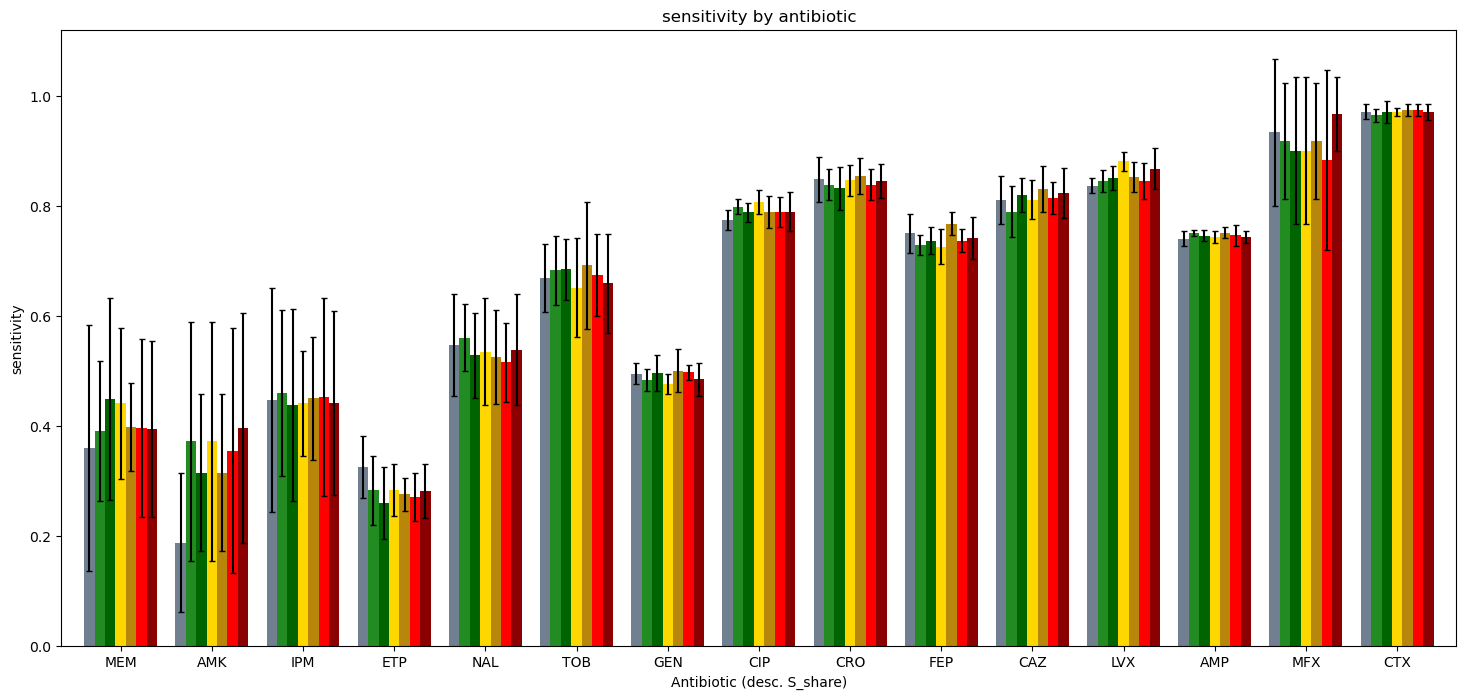

In [19]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

# Reduced training size

### p = (0.75, 0.7)

In [21]:
df_CV_noPT = load_and_create_train_share_df('No PT', '0.75_0.7')
df_CV_easyPT = load_and_create_train_share_df('Easy PT', '0.75_0.7')
df_CV_easyCPT = load_and_create_train_share_df('Easy CPT', '0.75_0.7')
df_CV_mediumPT = load_and_create_train_share_df('Medium PT', '0.75_0.7')
df_CV_mediumCPT = load_and_create_train_share_df('Medium CPT', '0.75_0.7')
df_CV_hardPT = load_and_create_train_share_df('Hard PT', '0.75_0.7')
df_CV_hardCPT = load_and_create_train_share_df('Hard CPT', '0.75_0.7')
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [df_CV_noPT, df_CV_easyPT, df_CV_easyCPT, df_CV_mediumPT, df_CV_mediumCPT, df_CV_hardPT, df_CV_hardCPT]

Saving plot to c:\Users\jespe\Documents\GitHub_local\ARFusion\results\figures\M_02_28\F1_by_train_share_0.75_0.7.png


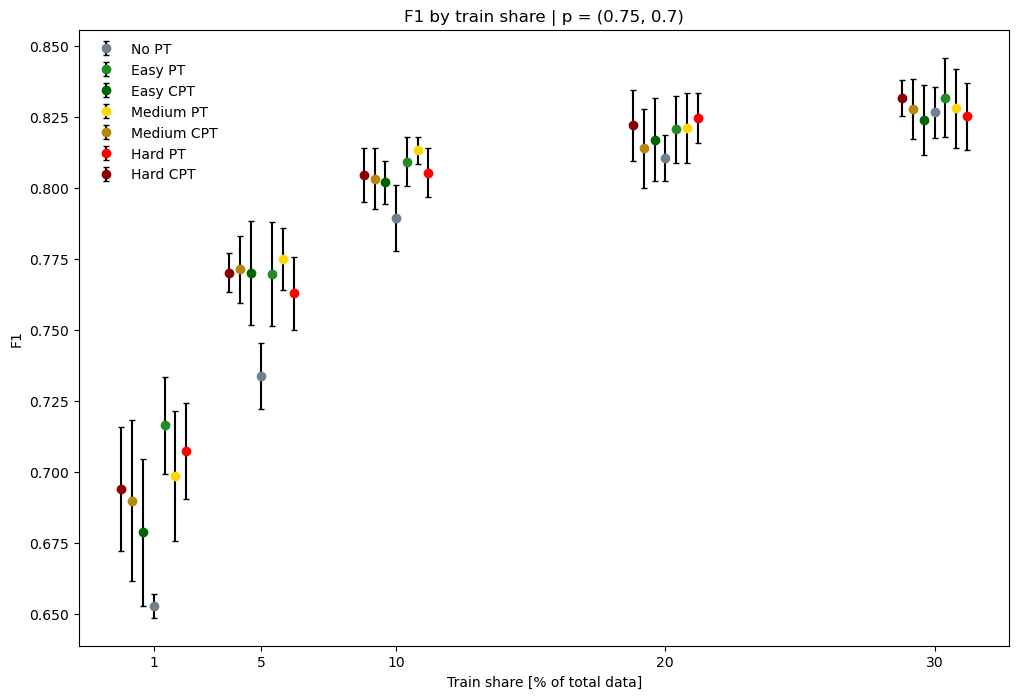

In [22]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p = (0.75, 0.7)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_0.75_0.7.png')
) 

Saving plot to c:\Users\jespe\Documents\GitHub_local\ARFusion\results\figures\M_02_28\sens_by_train_share_0.75_0.7.png


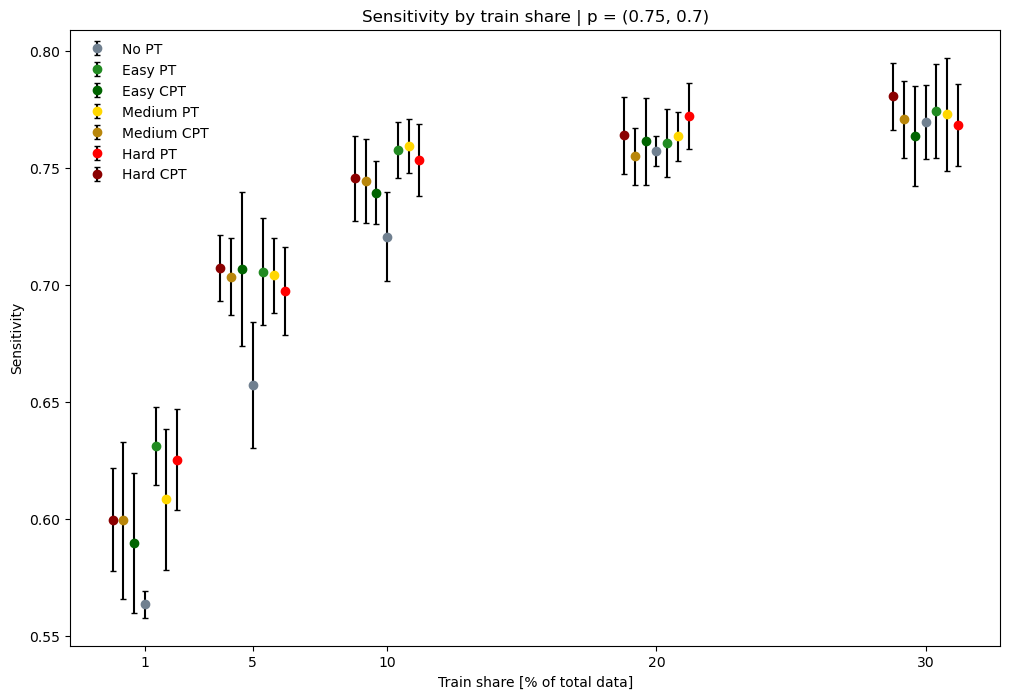

In [23]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Sensitivity',
    plot_title='Sensitivity by train share | p = (0.75, 0.7)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'sens_by_train_share_0.75_0.7.png')
) 

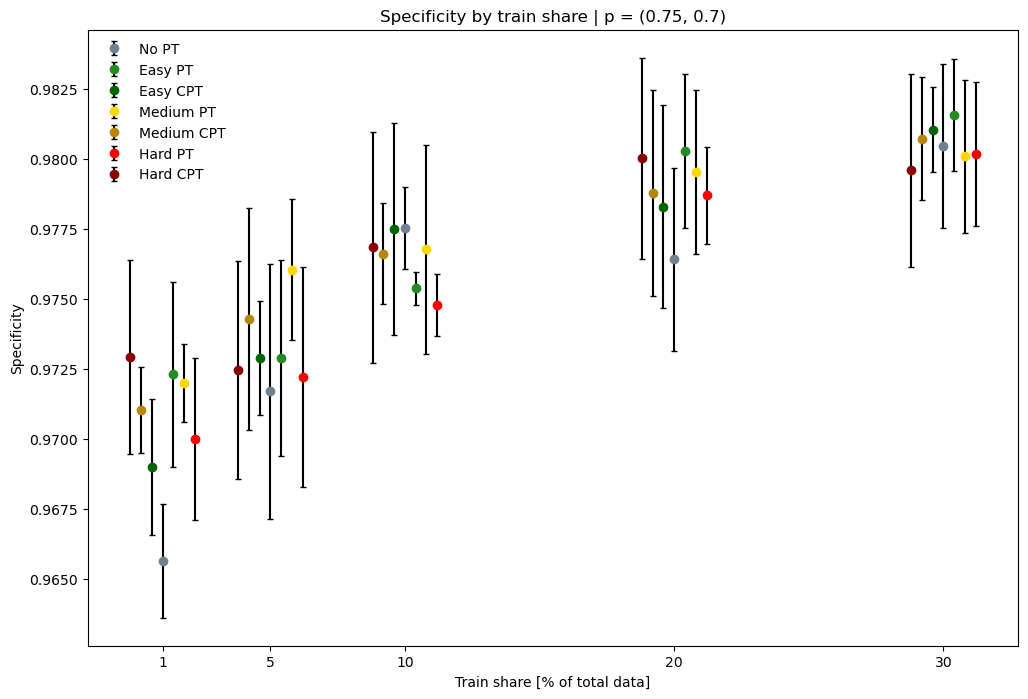

In [24]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Specificity',
    plot_title='Specificity by train share | p = (0.75, 0.7)',
    # save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_p_0.75_0.7.png'
) 

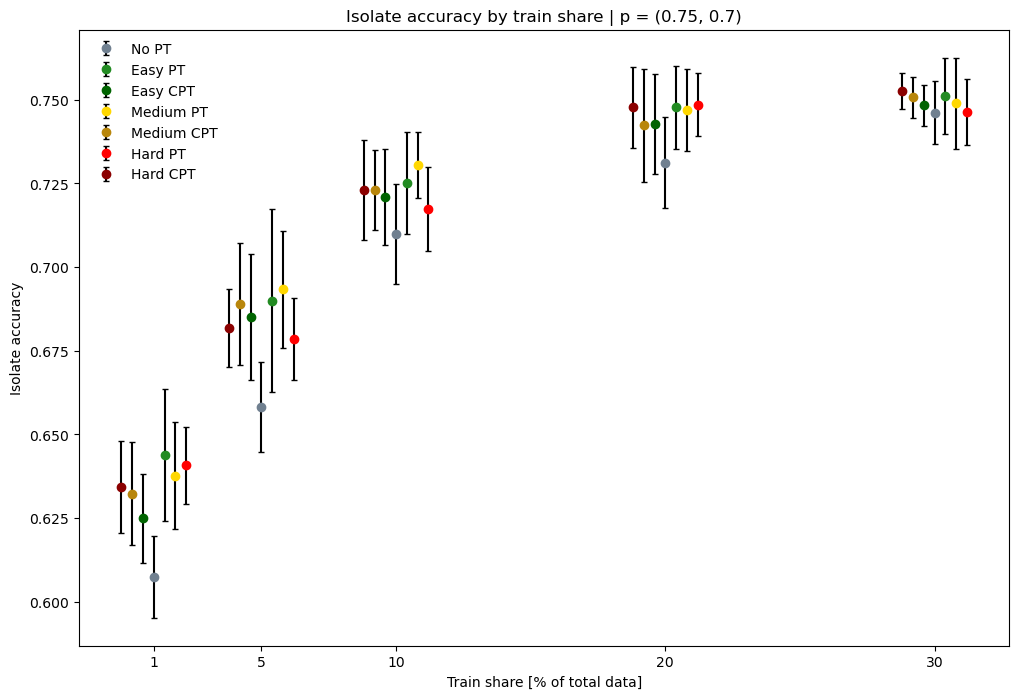

In [25]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Isolate accuracy',
    plot_title='Isolate accuracy by train share | p = (0.75, 0.7)',
    # save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_p_0.75_0.7.png'
) 

### p = (0.75, class)

In [26]:
df_CV_noPT = load_and_create_train_share_df('No PT', '0.75_class')
df_CV_easyPT = load_and_create_train_share_df('Easy PT', '0.75_class')
df_CV_easyCPT = load_and_create_train_share_df('Easy CPT', '0.75_class')
df_CV_mediumPT = load_and_create_train_share_df('Medium PT', '0.75_class')
df_CV_mediumCPT = load_and_create_train_share_df('Medium CPT', '0.75_class')
df_CV_hardPT = load_and_create_train_share_df('Hard PT', '0.75_class')
df_CV_hardCPT = load_and_create_train_share_df('Hard CPT', '0.75_class')
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [df_CV_noPT, df_CV_easyPT, df_CV_easyCPT, df_CV_mediumPT, df_CV_mediumCPT, df_CV_hardPT, df_CV_hardCPT]

Saving plot to c:\Users\jespe\Documents\GitHub_local\ARFusion\results\figures\M_02_28\F1_by_train_share_0.75_class.png


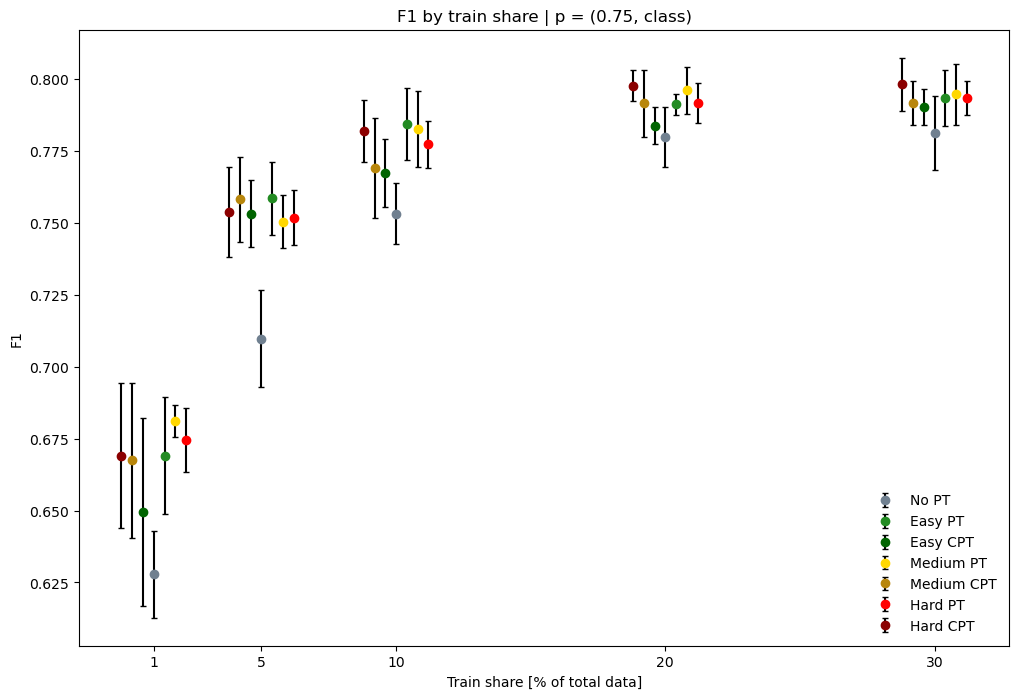

In [27]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p = (0.75, class)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_0.75_class.png')
) 

Saving plot to c:\Users\jespe\Documents\GitHub_local\ARFusion\results\figures\M_02_28\sens_by_train_share_p_0.75_class.png


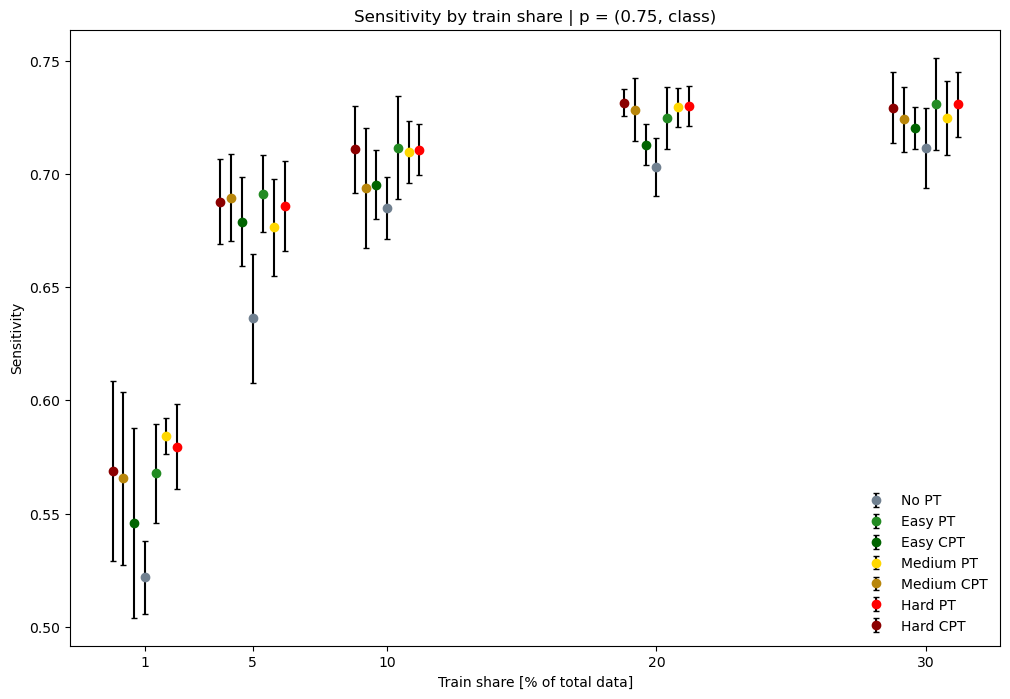

In [28]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Sensitivity',
    plot_title='Sensitivity by train share | p = (0.75, class)',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'sens_by_train_share_p_0.75_class.png')
) 

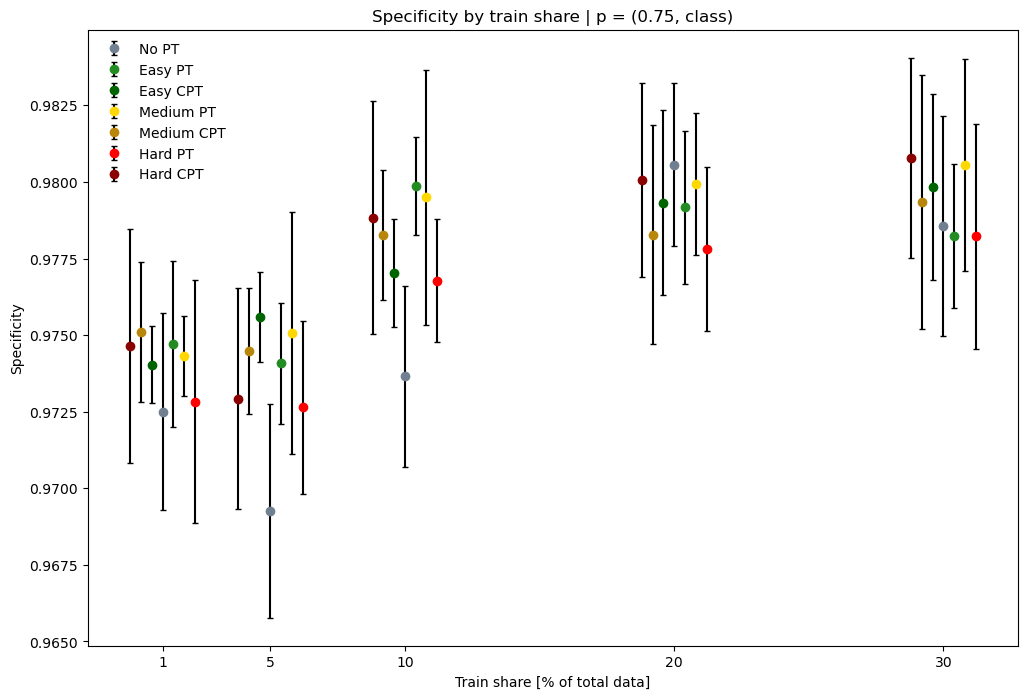

In [29]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Specificity',
    plot_title='Specificity by train share | p = (0.75, class)',
    # save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_p_0.75_0.7.png'
) 

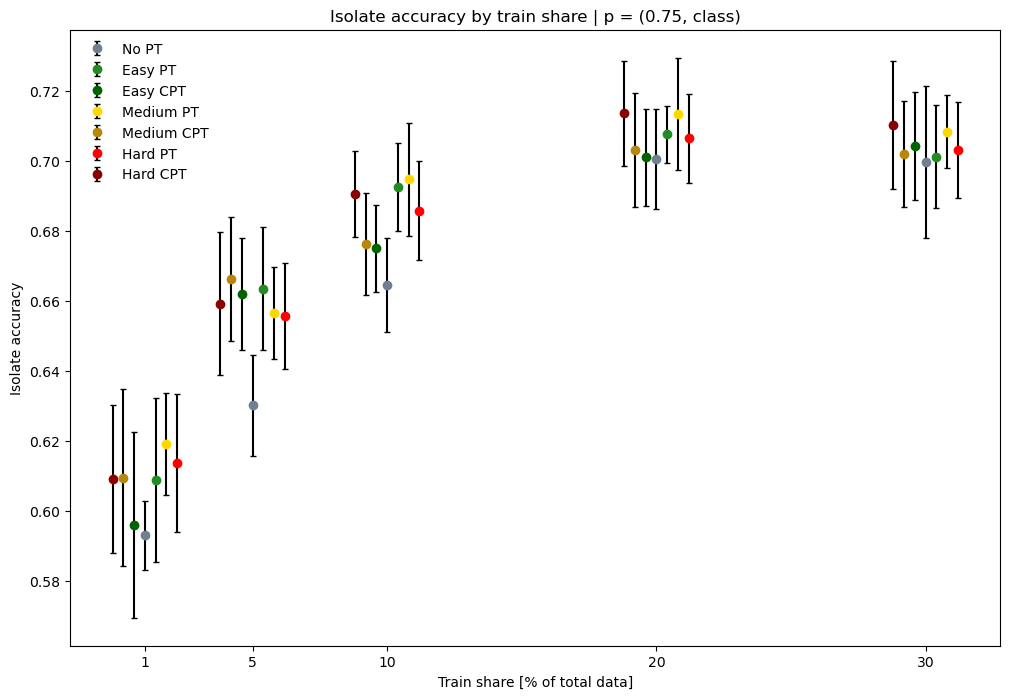

In [30]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'Isolate accuracy',
    plot_title='Isolate accuracy by train share | p = (0.75, class)',
    # save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_p_0.75_0.7.png'
) 

# In-depth plots at specific train shares

### 1%

p = (0.75, 0.7)

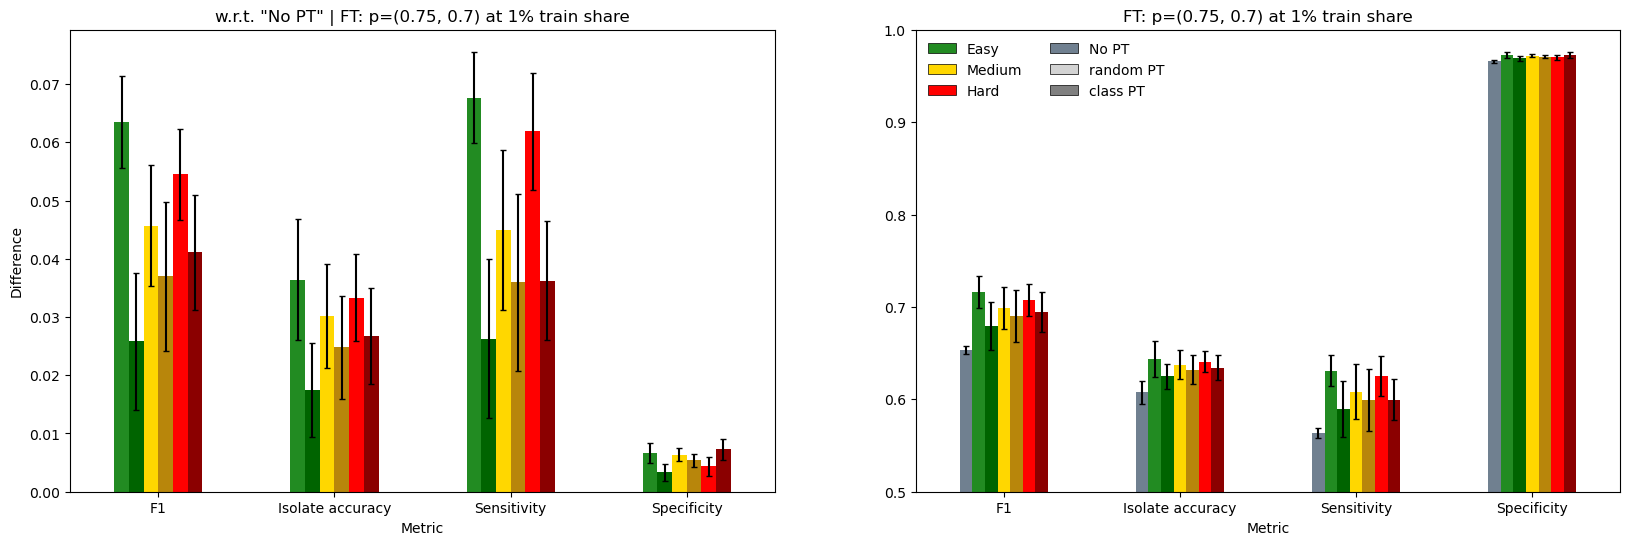

In [31]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.7', '0.01')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.7) at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.7) at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.01.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\U

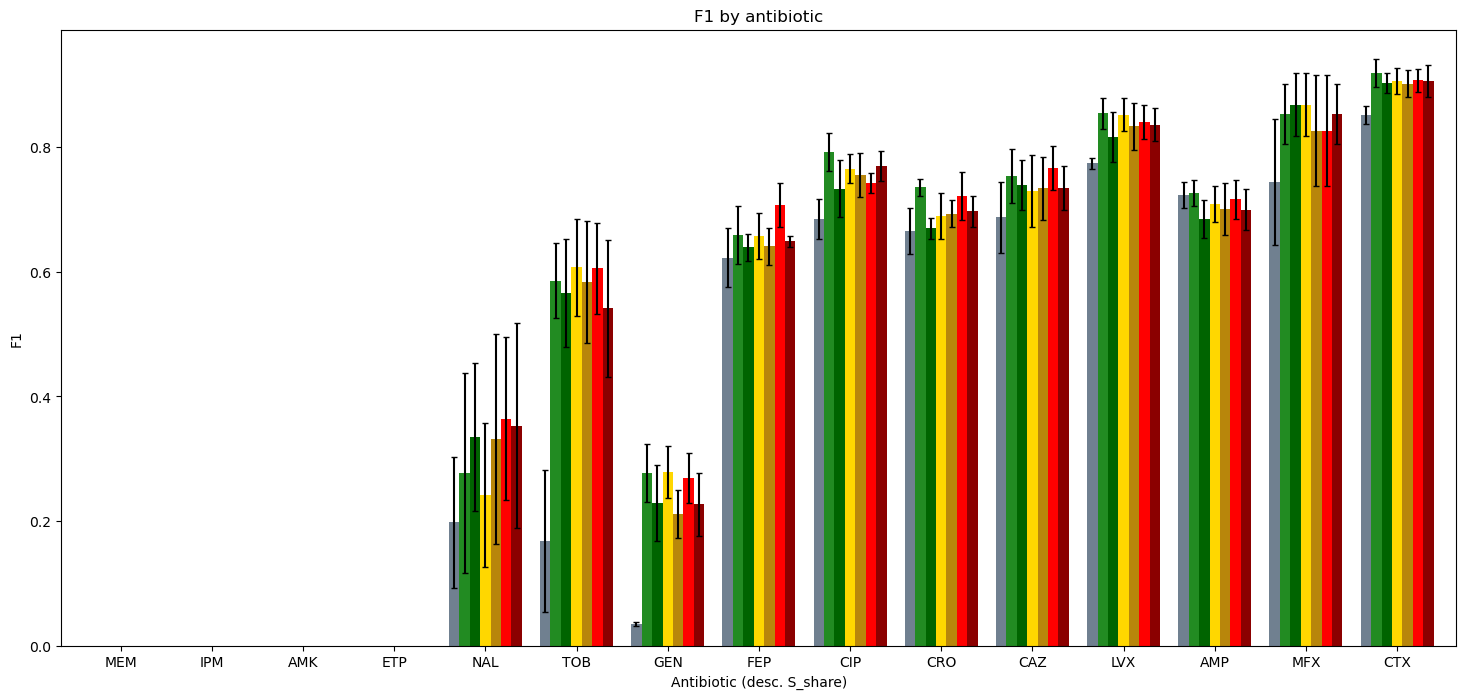

In [32]:
df_CV_ab = load_and_create_ab_df('0.75_0.7', train_share='0.01')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_F1_by_ab_0.01.png')
)

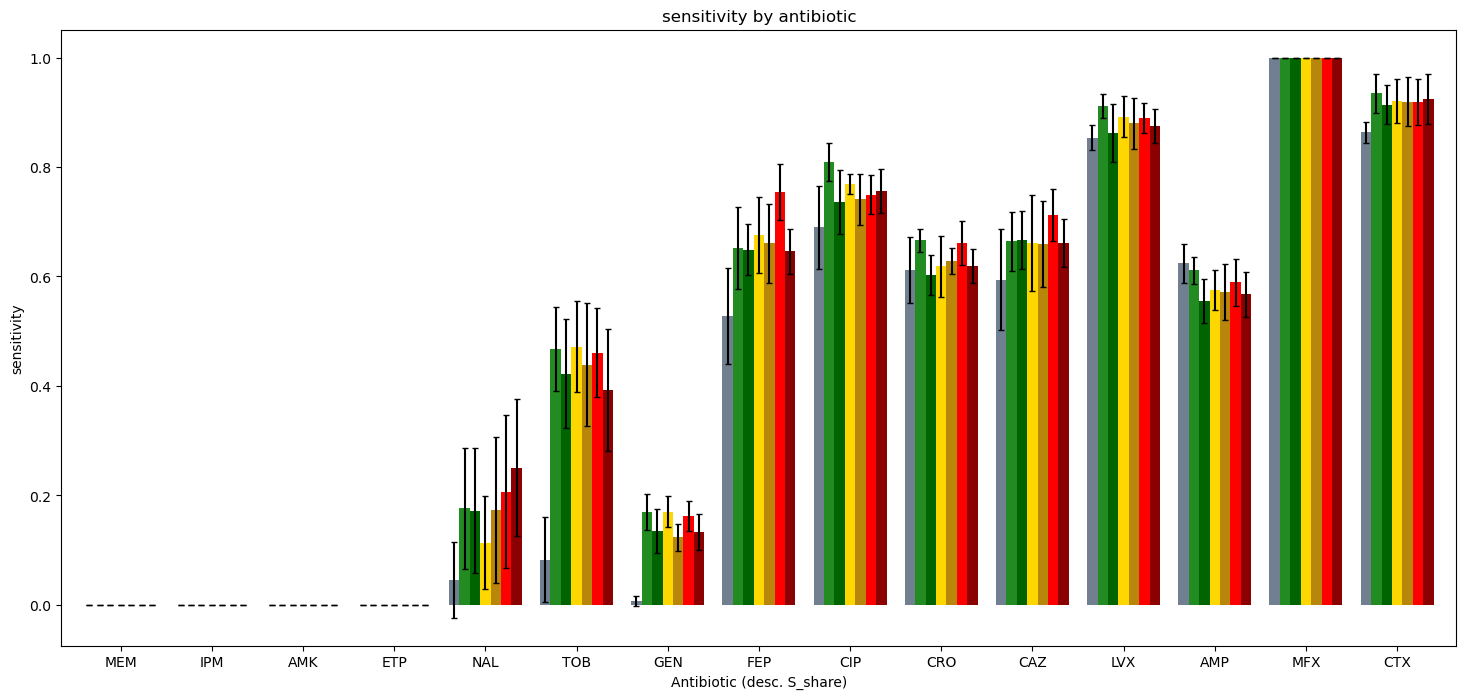

In [33]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

p = (0.75, 1 class)

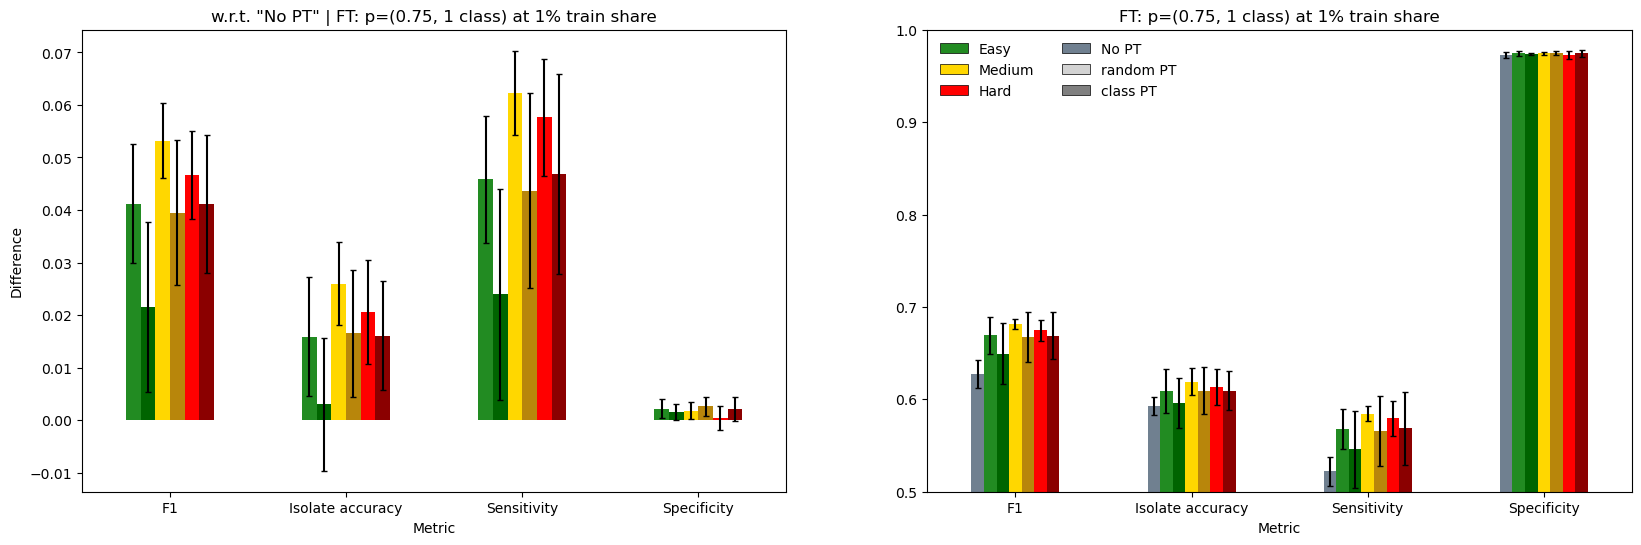

In [34]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_class', '0.01')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 1 class) at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 1 class) at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'classFT_diff_0.01.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\U

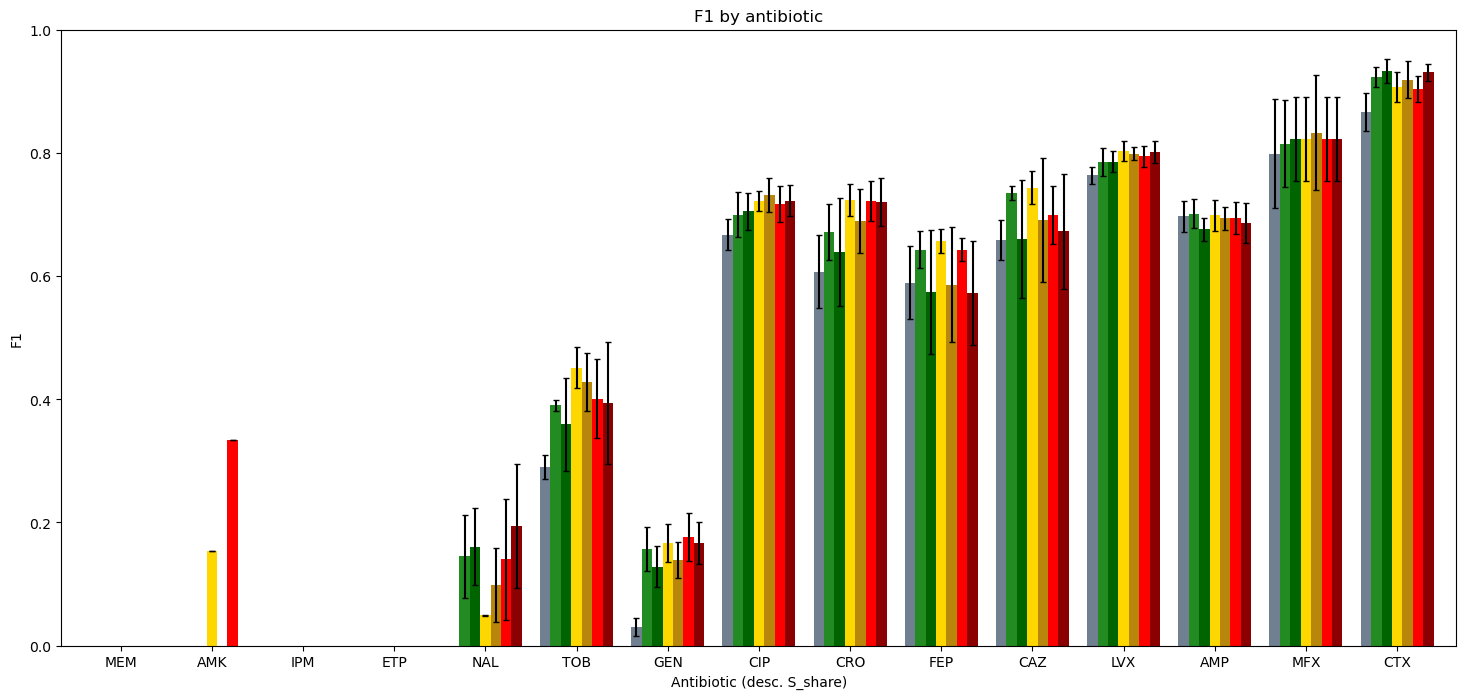

In [35]:
df_CV_ab = load_and_create_ab_df('0.75_class', train_share='0.01')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

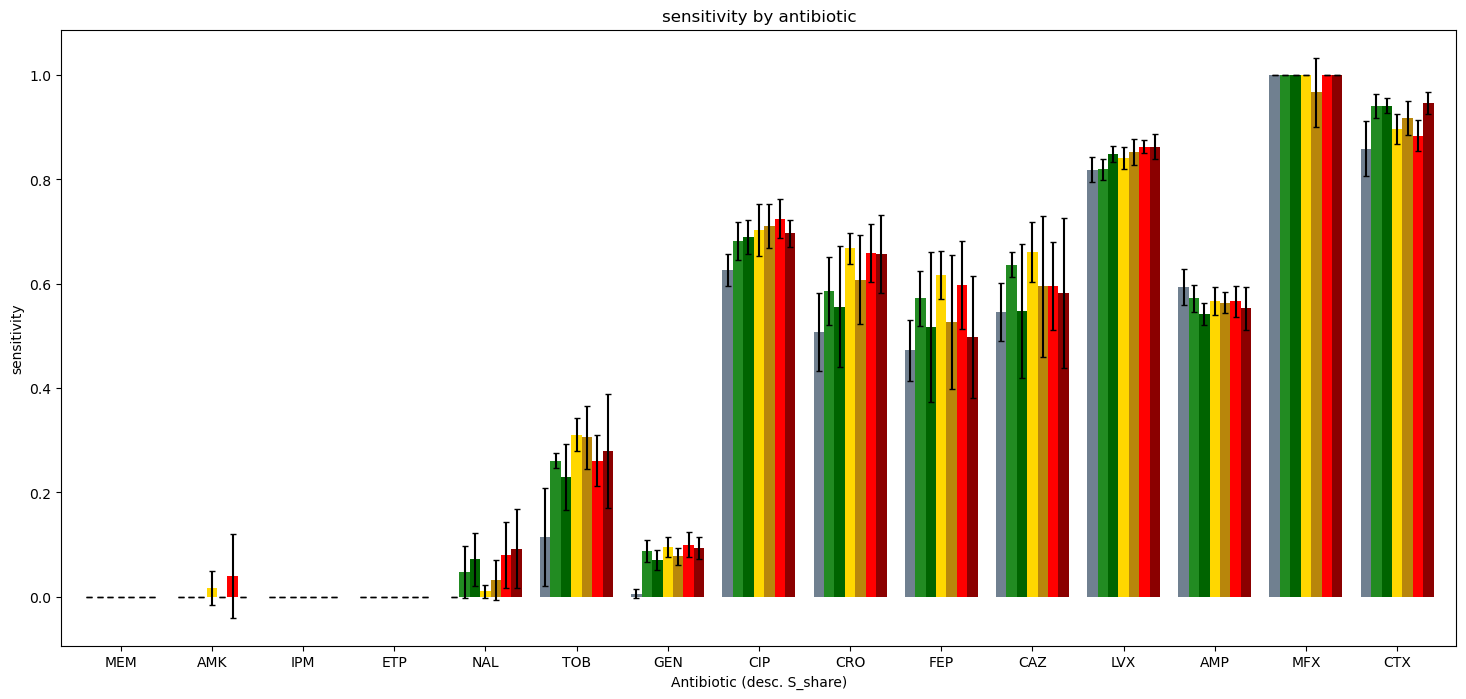

In [36]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### 5%

p = (0.75, 0.7)

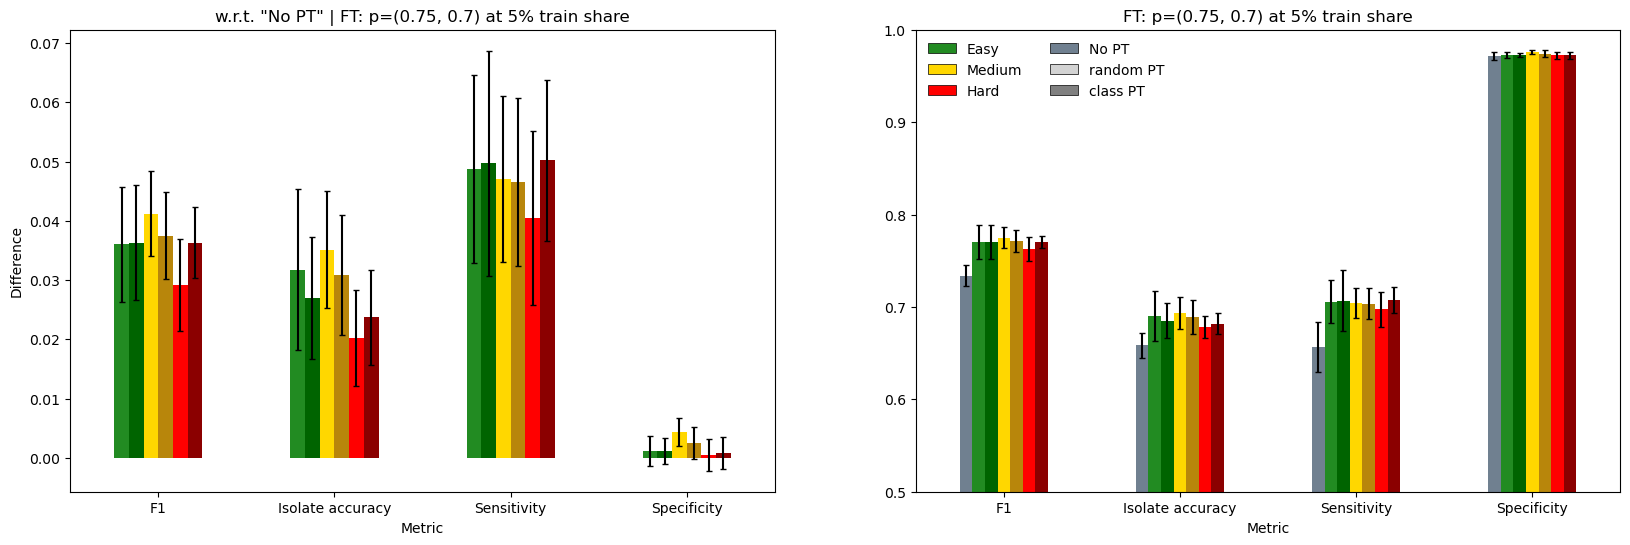

In [37]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.7', '0.05')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.7) at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.7) at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.05.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


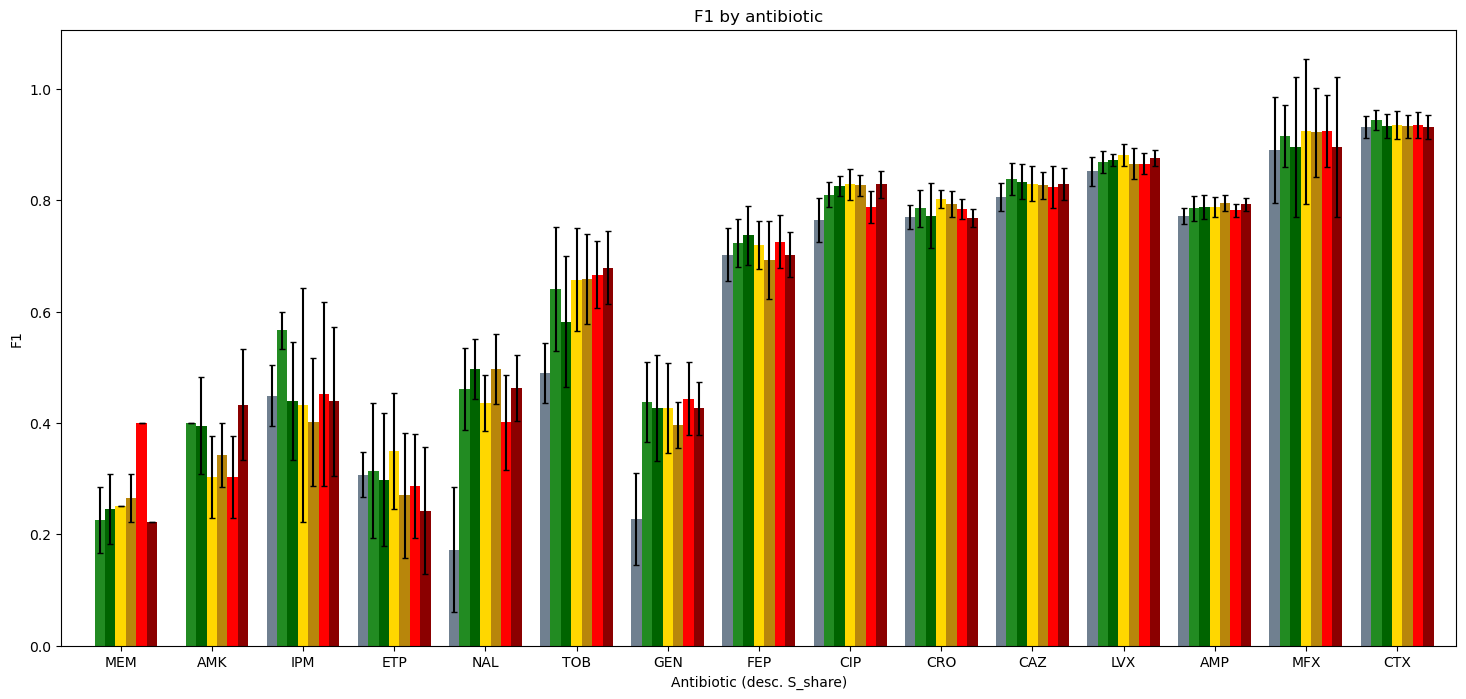

In [38]:
df_CV_ab = load_and_create_ab_df('0.75_0.7', train_share='0.05')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

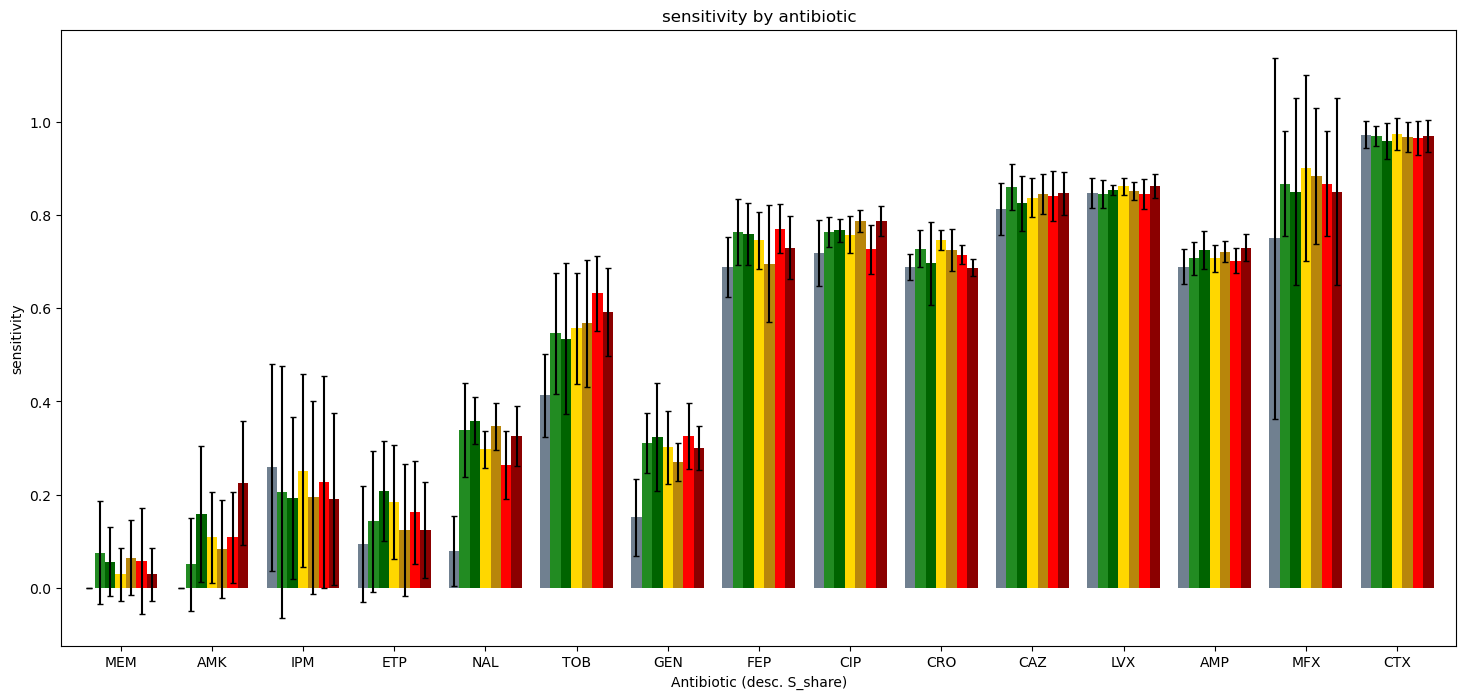

In [39]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

p=(0.75, 1 class)

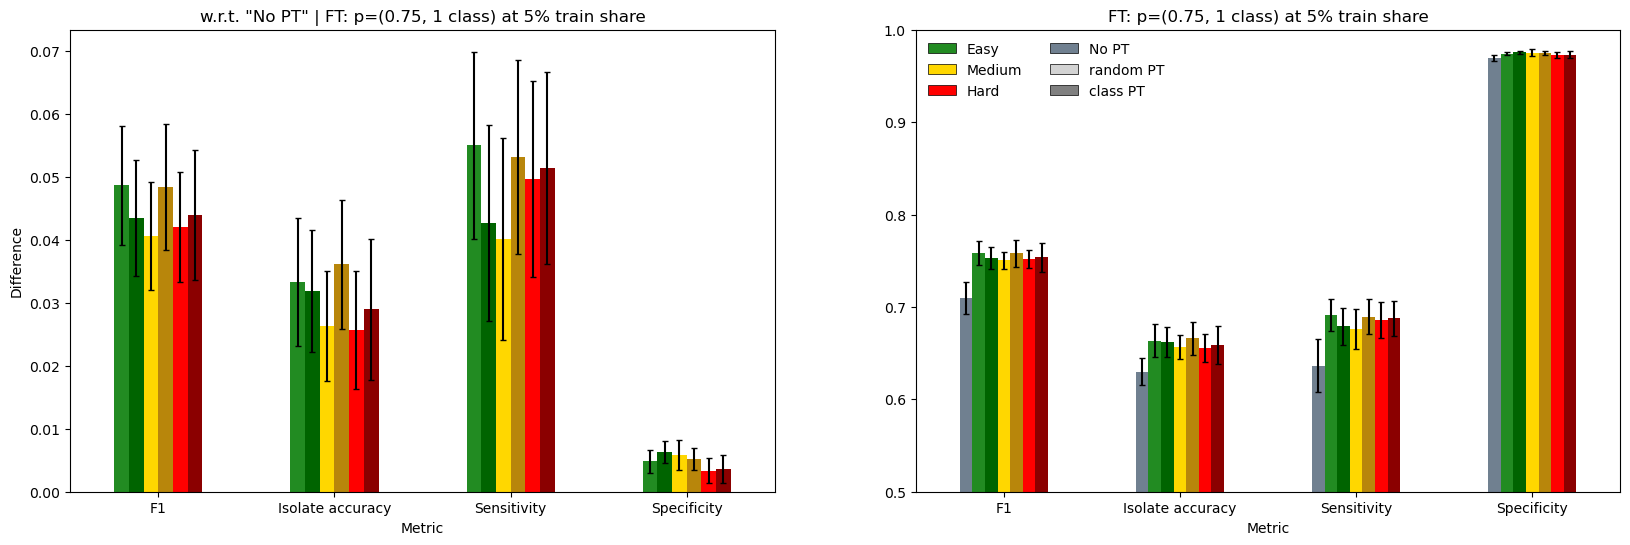

In [40]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_class', '0.05')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 1 class) at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 1 class) at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'classFT_diff_0.05.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:129: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


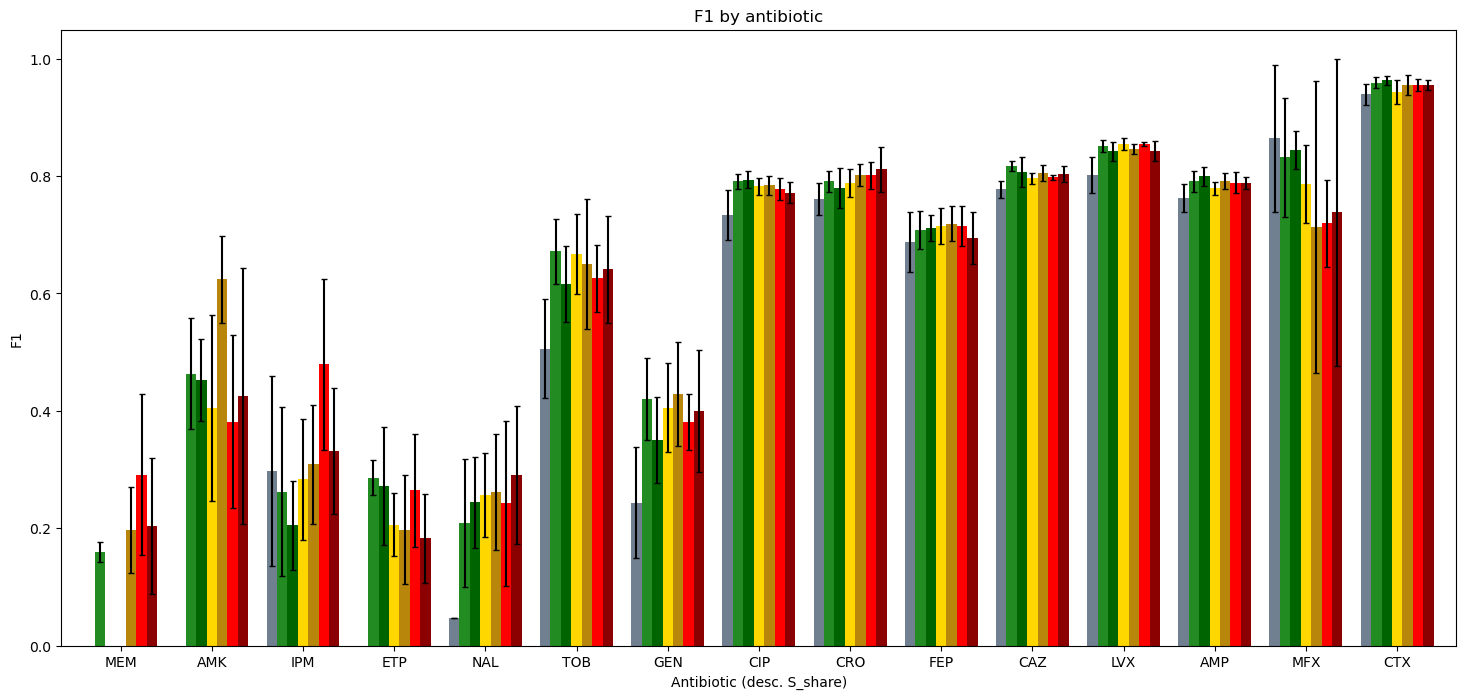

In [41]:
df_CV_ab = load_and_create_ab_df('0.75_class', train_share='0.05')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

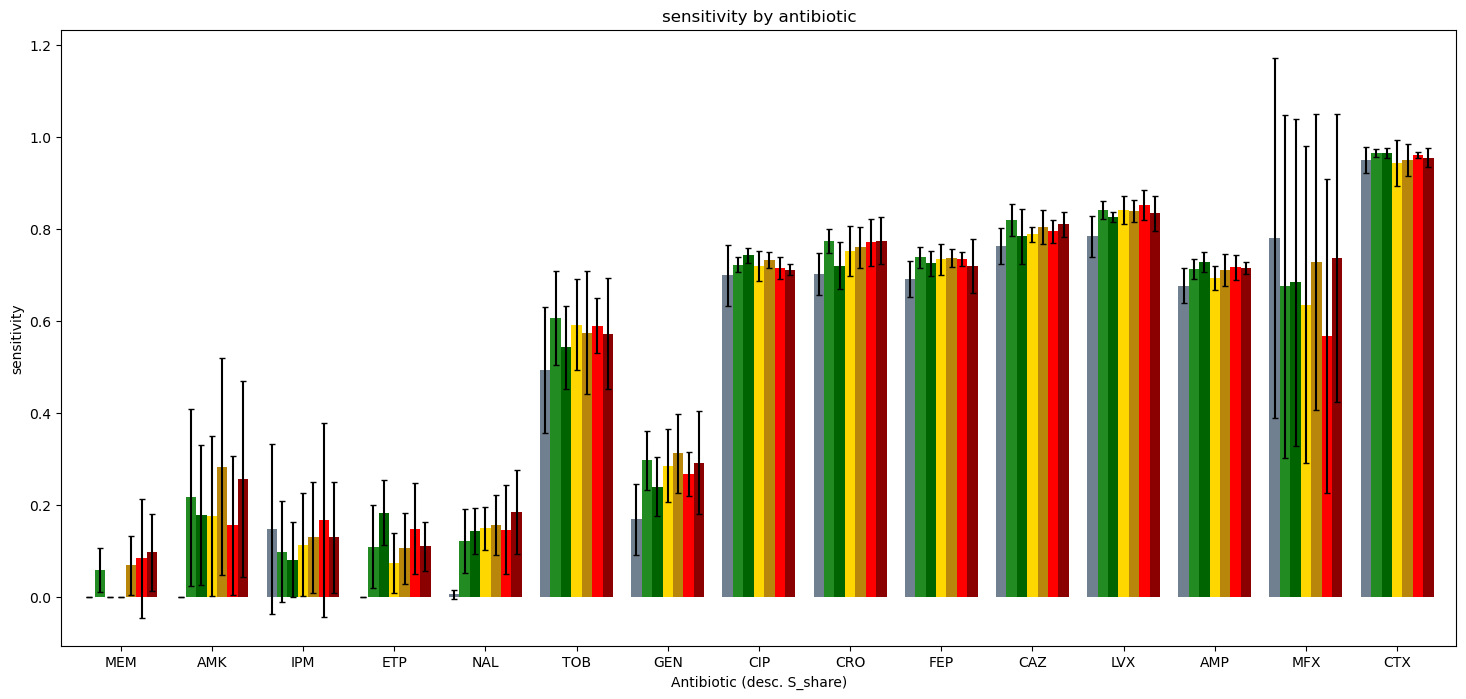

In [42]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### 10%

p = (0.75, 0.7)

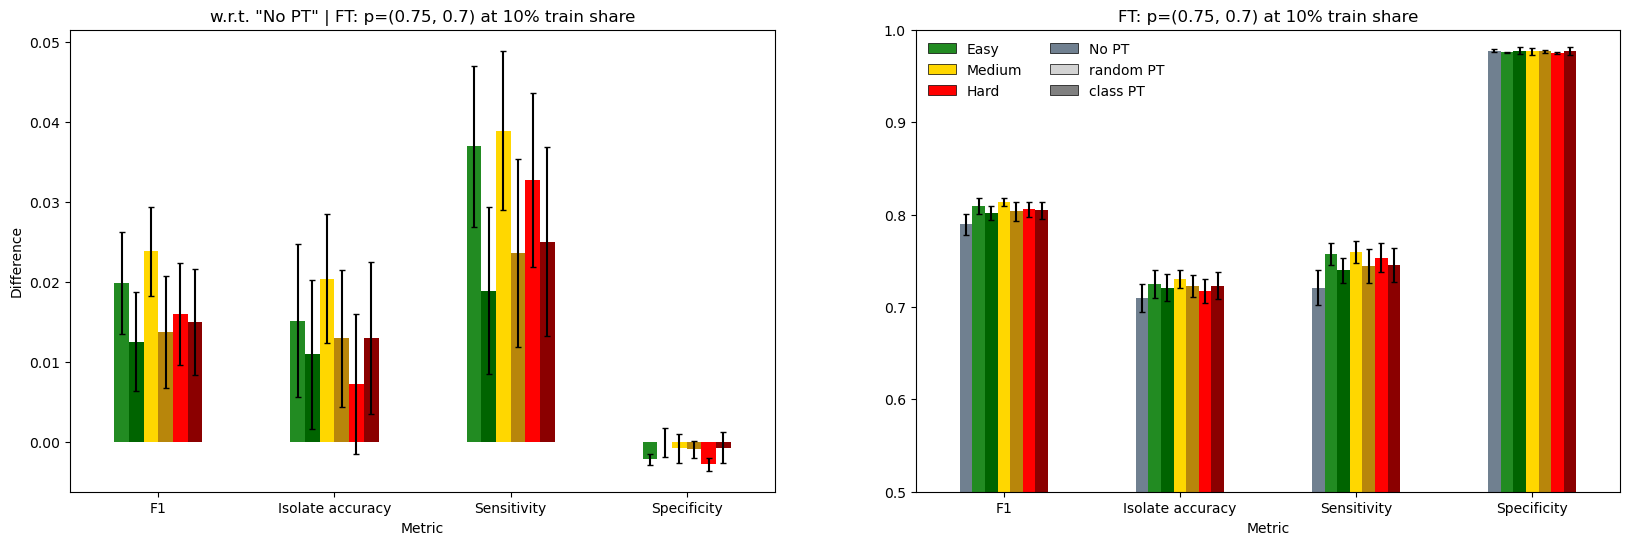

In [43]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.7', '0.1')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.7) at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.7) at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

### 30%

p = (0.75, 0.7)

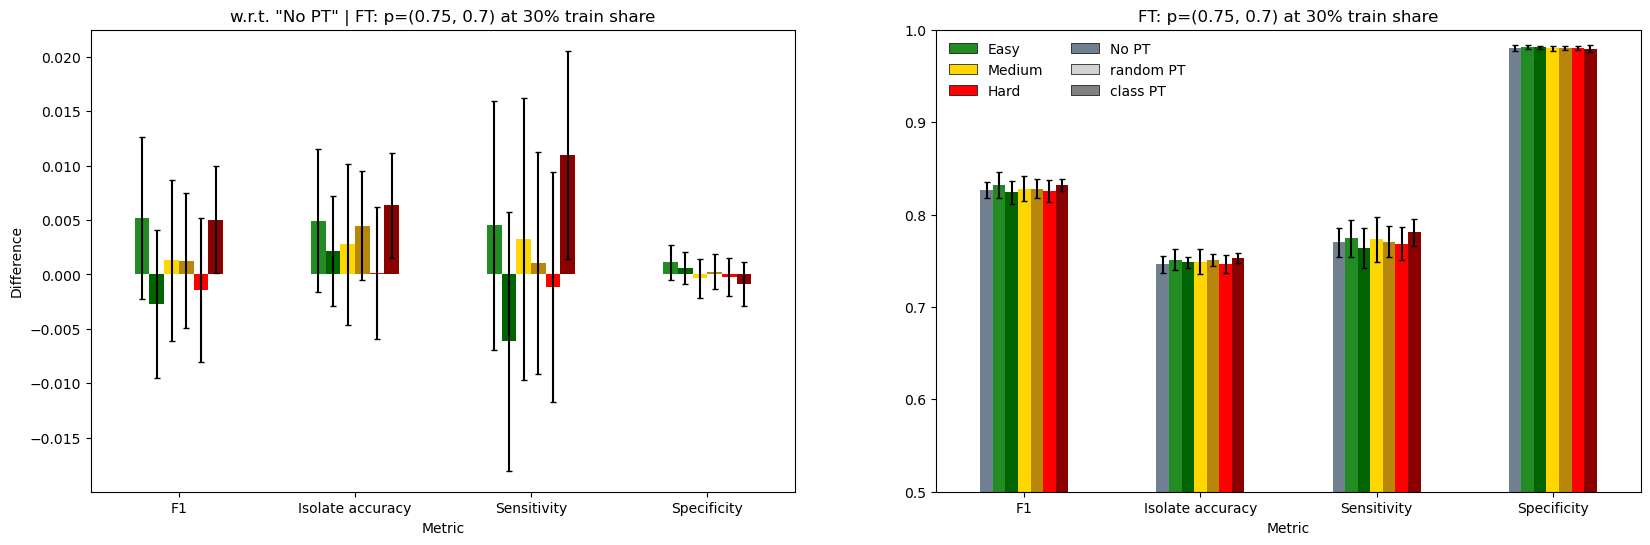

In [44]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_0.7', '0.3')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 0.7) at 30% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 0.7) at 30% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.3.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

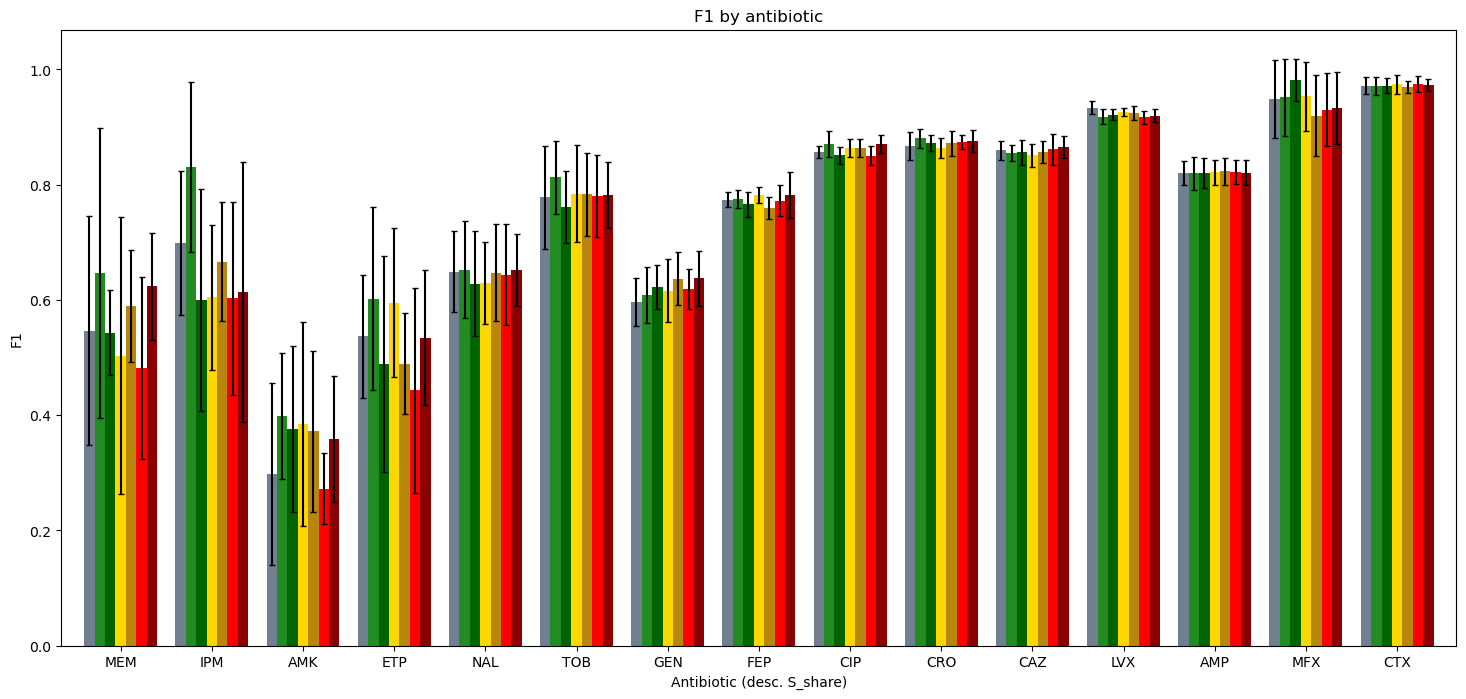

In [45]:
df_CV_ab = load_and_create_ab_df('0.75_0.7', train_share='0.3')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

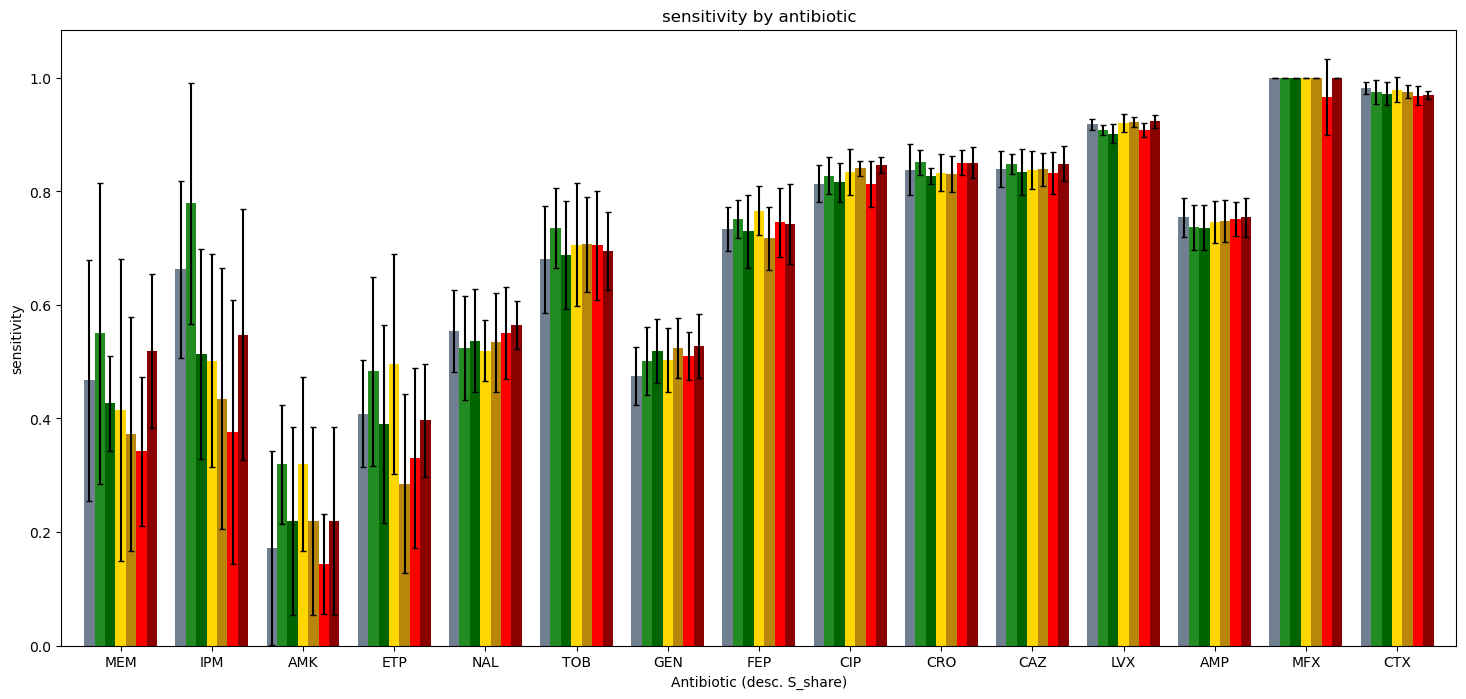

In [46]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

p = (0.75, class)

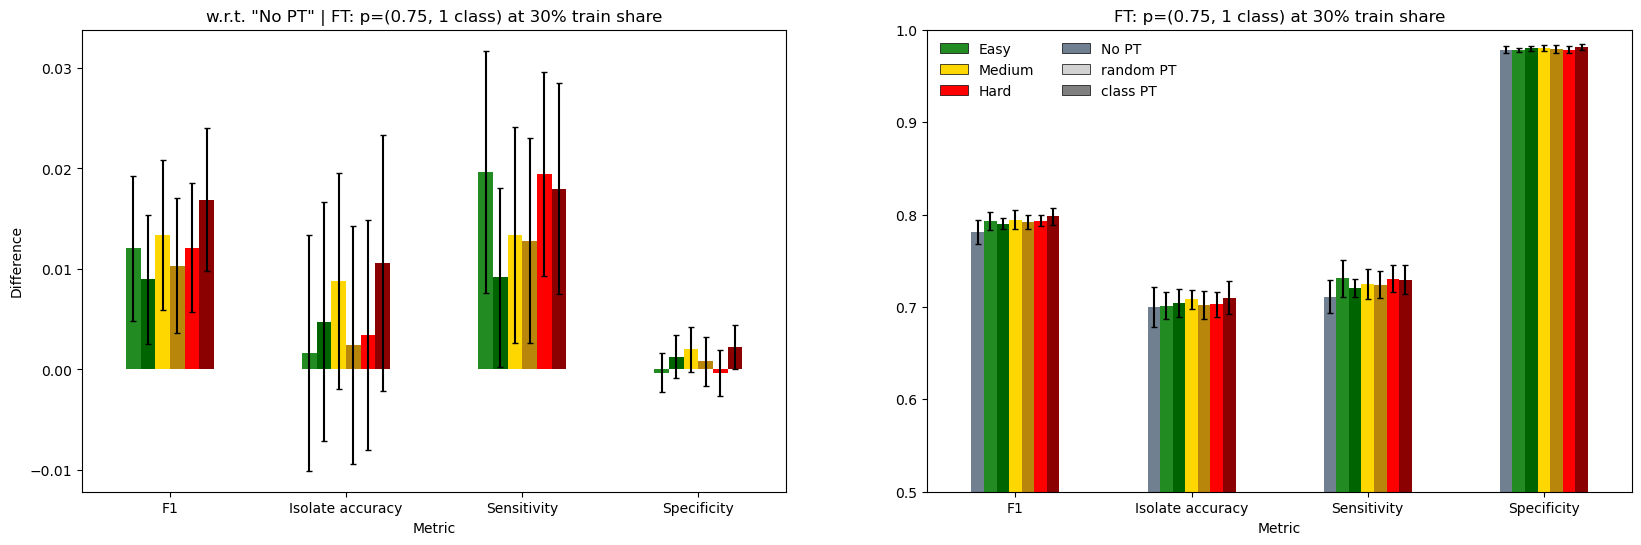

In [47]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs('0.75_class', '0.3')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=(0.75, 1 class) at 30% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=(0.75, 1 class) at 30% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'classFT_diff_0.3.png') 
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True)
plt.show()

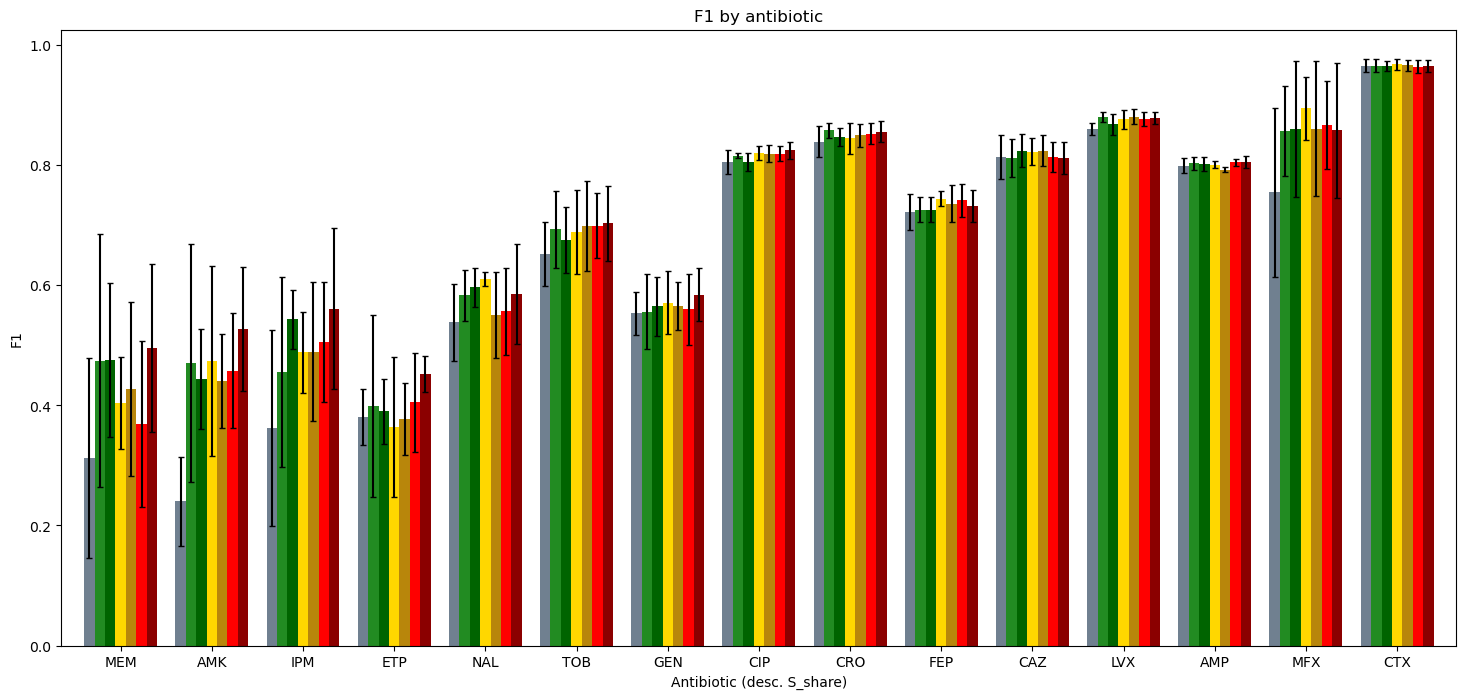

In [48]:
df_CV_ab = load_and_create_ab_df('0.75_class', train_share='0.3')
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

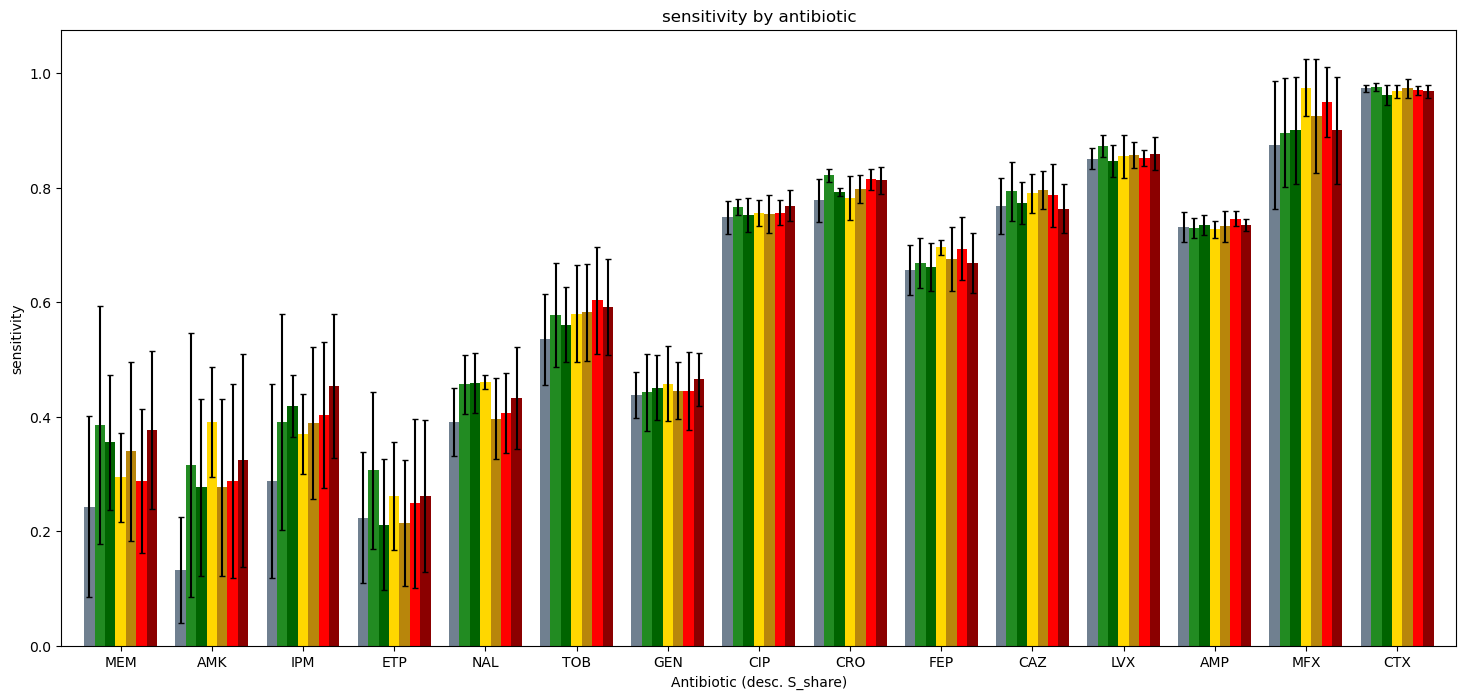

In [49]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)